<div style="border: 1px solid #006400; background-color: #e6f4ea; padding: 10px; border-radius: 5px; text-align: center;">
  <h1 style="color: #006400; margin: 0;">P10 - Modélisez les Ventes d'un Ensemble de Magasin</h1>
</div>

<div style="border: 1px solid #006400; padding: 10px; border-radius: 5px;">
  <h2 style="color: #006400; margin-top: 0;">Objectifs:</h2>
  <ul style="color: #333;">
    <li>Caractériser les différentes typologies de magasin de l'enseigne en fonction des caractéristiques de vente et de l'environnement du magasin</li>
    <li>Construire un modèle de prévision des ventes basique puis grâce à des méthodes de prévision des séries temporelles</li>
    <li>Évaluer la performance des modèles sur un magasin par groupe</li>
  </ul>
</div>

<div style="border: 1px solid #006400; padding: 10px; border-radius: 5px;">
  <h2 style="color: #006400; margin-top: 0;">Méthodologie</h2>

  <p><span style="color: #006400; text-decoration: underline;"><strong>1. Explorez le jeu de données</strong></span></p>
  <ul>
    <li>Structure des données</li>
    <li>Analyse exploratoire des fichiers</li>
    <li>Jointure des dataframes</li>
    <li>Ordres de grandeurs</li>
    <li>Indicateurs statistiques</li>
    <li>Visualisation de la distribution : Test de Normalité</li>
  </ul>

  <p><span style="color: #006400; text-decoration: underline;"><strong>2. Caractérisez les différentes typologies de magasin</strong></span></p>
  <ul>
    <li>Comparer les volumes de vente au mois et à l'année des magasins</li>
    <li>Déterminer les paramètres influants sur le volume de vente (régression linéaire)</li>
    <li>Catégorisez les magasins grâce à K-means selon différents critères</li>
  </ul>

  <p><span style="color: #006400; text-decoration: underline;"><strong>3. Construisez un modèle de prévision des ventes</strong></span></p>
  <ul>
    <li>Modélisation par moyenne glissante (15 jours)</li>
    <li>Modélisation par méthode SARIMA</li>
  </ul>

  <p><span style="color: #006400; text-decoration: underline;"><strong>4. Évaluer la performance du modèle de prévision sur les différents groupes de magasin</strong></span></p>
  <ul>
    <li>Sélectionnez un Magasin par Cluster</li>
    <li>Comparaison des Performances des Modèles pour un Magasin Donné dans Chaque Groupe</li>
  </ul>

  <p><span style="color: #006400; text-decoration: underline;"><strong>5. Recommandations</strong></span></p>
  <ul>
    <li>Pistes d’Optimisation Basées sur les Résultat</li>
    <li>Adaptez les Stratégies Commerciales selon les Typologies de Magasin</li>
    <li>Améliorations du Modèle selon les Performances Observées</li>
  </ul>
</div>


<div style="border: 1px solid #006400; background-color: #e6f4ea; padding: 10px; border-radius: 5px;">
  <h2 style="color: #006400; margin: 0;">1. Explorer le Jeu de Données</h2>
</div>


<div style="border: 1px solid #006400; padding: 10px; border-radius: 5px; margin-left: 20px;">
  <h3 style="color: #006400; margin: 0;">1.1 Structure des Données</h3>
</div>


In [6]:
#Importation de la librairie Pandas
import pandas as pd

In [7]:
#Afficher toutes les colonnes d'un dataframe
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [8]:
#Importation des fichiers csv
df_magasin= pd.read_csv("store.csv")

In [9]:
df_historique_vente= pd.read_csv("train.csv")

C:\Users\quitt\AppData\Local\Temp\ipykernel_68032\355870559.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df_historique_vente= pd.read_csv("train.csv")


In [10]:
#Check du message d'erreur en affichant les valeurs de la colonne et en comparant avec le dictionnaire de données.
df_historique_vente = pd.read_csv("train.csv", low_memory=False)
print(df_historique_vente.iloc[:, 7].unique())

['0' 'a' 'b' 'c']


La colonne 7 contient des valeurs mixtes avec des chiffres '0' et des lettres 'a', 'b', 'c'.  Pandas ne sait pas quel type de données attribuer à cette colonne, car il y a des valeurs de types différents.

D'apres notre dictionnaire de données, cela correspond à la colonne StateHoliday, avec comme type de données catégorielles-lettres. Nous allons donc la convertir en catégorie. Les valeurs '0' ne disparaîtront pas, elles seront simplement converties en une catégorie, et leur représentation sous forme de chaîne sera maintenue.

In [12]:
df_historique_vente.iloc[:, 7] = df_historique_vente.iloc[:, 7].astype('category')
print(df_historique_vente.iloc[:, 7].dtype)

object


<div style="border: 1px solid #006400; padding: 10px; border-radius: 5px; margin-left: 20px;">
  <h3 style="color: #006400; margin: 0;">1.2 Analyse Exploratoire des Fichiers</h3>
</div>


<div style="border: 1px solid #006400; padding: 10px; border-radius: 5px; margin-left: 40px;">
  <h4 style="color: #006400; margin: 0;">1.2.1 Analyse Exploratoire du Fichier "Store" et de ses Variables</h4>
</div>


In [15]:
#Afficher les dimensions du dataset
print("Le tableau comporte {} observation(s) ou article(s)".format(df_magasin.shape[0]))
print("Le tableau comporte {} colonne(s)".format(df_magasin.shape[1]))

Le tableau comporte 1115 observation(s) ou article(s)
Le tableau comporte 10 colonne(s)


In [16]:
#Consulter le nombre de colonnes
df_magasin.shape

(1115, 10)

In [17]:
#Consulter la nature des données dans chacune des colonnes et faire une vérification avec notre dictionnaire de données pour vérifier les correspondances.
df_magasin.dtypes

Store                          int64
StoreType                     object
Assortment                    object
CompetitionDistance          float64
CompetitionOpenSinceMonth    float64
CompetitionOpenSinceYear     float64
Promo2                         int64
Promo2SinceWeek              float64
Promo2SinceYear              float64
PromoInterval                 object
dtype: object

In [18]:
#Consulter le nombre de valeurs présentes dans chacune des colonnes
df_magasin.count()

Store                        1115
StoreType                    1115
Assortment                   1115
CompetitionDistance          1112
CompetitionOpenSinceMonth     761
CompetitionOpenSinceYear      761
Promo2                       1115
Promo2SinceWeek               571
Promo2SinceYear               571
PromoInterval                 571
dtype: int64

In [19]:
#Afficher les 5 premières lignes de la table
df_magasin.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [20]:
#Vérifier si il y a les lignes en doublons dans la colonne store
df_magasin['Store'].duplicated()

0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
30      False
31      False
32      False
33      False
34      False
35      False
36      False
37      False
38      False
39      False
40      False
41      False
42      False
43      False
44      False
45      False
46      False
47      False
48      False
49      False
50      False
51      False
52      False
53      False
54      False
55      False
56      False
57      False
58      False
59      False
60      False
61      False
62      False
63      False
64      False
65      False
66      False
67      False
68      False
69      False
70      False
71    

In [21]:
# Compter le nombre de doublons dans la colonne 'store'
nombre_doublons = df_magasin['Store'].duplicated().sum()
# Afficher une phrase indiquant le nombre de doublons
print(f"Il y a {nombre_doublons} doublons dans la colonne 'Store'.")

Il y a 0 doublons dans la colonne 'Store'.


In [22]:
# Compter le nombre de magasins
nb_magasins =df_magasin['Store'].nunique()
print(f"Il y a {nb_magasins} magasins différents.")

Il y a 1115 magasins différents.


In [23]:
#Afficher les valeurs manquantes
print(df_magasin.isnull().sum())

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64


In [24]:
# Filtrer les lignes où CompetitionDistance est manquant
distance_manquant = df_magasin[df_magasin['CompetitionDistance'].isnull()]

# Afficher les lignes avec CompetitionDistance manquant
print(distance_manquant)

     Store StoreType Assortment  CompetitionDistance  \
290    291         d          a                  NaN   
621    622         a          c                  NaN   
878    879         d          a                  NaN   

     CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
290                        NaN                       NaN       0   
621                        NaN                       NaN       0   
878                        NaN                       NaN       1   

     Promo2SinceWeek  Promo2SinceYear    PromoInterval  
290              NaN              NaN              NaN  
621              NaN              NaN              NaN  
878              5.0           2013.0  Feb,May,Aug,Nov  


La colonne CompetitionDistance représente la distance en mètres jusqu'au magasin concurrent le plus proche. Pour les magasins avec les identifiants 291, 622 et 879, cette distance n'est pas renseignée. Les valeurs NaN dans cette colonne indiquent soit l'absence de concurrents proches, soit un manque de données collectées pour ces magasins.

Afin d’éviter les valeurs manquantes, nous allons procéder à une imputation par la médiane. Cette méthode consiste à remplacer les valeurs absentes d’une variable numérique — ici CompetitionDistance — par la médiane des valeurs disponibles de cette même variable.

La médiane est la valeur qui sépare une série ordonnée en deux parties égales : 50 % des observations sont inférieures et 50 % sont supérieures.

L’imputation par la médiane a pour objectif de réduire l’impact des données manquantes sans introduire de biais majeur, tout en préservant la distribution des données. Elle est particulièrement pertinente en présence de valeurs extrêmes (outliers), pour lesquelles la moyenne serait moins représentative.

In [27]:
# Calcul de la médiane (hors valeurs manquantes)
median_distance = df_magasin['CompetitionDistance'].median()
print(median_distance)

2325.0


In [28]:
# Remplacer les NaN par la médiane
df_magasin['CompetitionDistance'] = df_magasin['CompetitionDistance'].fillna(median_distance)

In [29]:
# Vérification que les NaN ont été remplacés
print(df_magasin['CompetitionDistance'].isnull().sum())

0


Deux autres colonnes ont des valeurs manquantes: 
- CompetitionOpenSinceMonth: qui correspond au mois d'ouverture du magasin concurrent le plus proche.
- CompetitionOpenSinceYear: qui correspond à l'année d'ouverture du magasin concurrent le plus proche.

In [31]:
# Filtrer les lignes où CompetitionOpenSinceMonth ou CompetitionOpenSinceYear sont manquants
competition_manquant = df_magasin[df_magasin['CompetitionOpenSinceMonth'].isnull() | df_magasin['CompetitionOpenSinceYear'].isnull()]

# Afficher les lignes avec CompetitionOpenSinceMonth ou CompetitionOpenSinceYear manquants
print(competition_manquant.head())

    Store StoreType Assortment  CompetitionDistance  \
11     12         a          c               1070.0   
12     13         d          a                310.0   
15     16         a          c               3270.0   
18     19         a          c               3240.0   
21     22         a          a               1040.0   

    CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
11                        NaN                       NaN       1   
12                        NaN                       NaN       1   
15                        NaN                       NaN       0   
18                        NaN                       NaN       1   
21                        NaN                       NaN       1   

    Promo2SinceWeek  Promo2SinceYear     PromoInterval  
11             13.0           2010.0   Jan,Apr,Jul,Oct  
12             45.0           2009.0   Feb,May,Aug,Nov  
15              NaN              NaN               NaN  
18             22.0           2011.0  

In [32]:
# Calculer le nombre total de lignes
total_lignes = len(df_magasin)

# Calculer le nombre de lignes avec des valeurs manquantes
nombre_lignes_manquantes = len(competition_manquant)

# Calculer le pourcentage
pourcentage_manquant = (nombre_lignes_manquantes / total_lignes) * 100

# Afficher le pourcentage
print(f"Le pourcentage de lignes avec des valeurs manquantes : {pourcentage_manquant:.2f}%")

Le pourcentage de lignes avec des valeurs manquantes : 31.75%


Au vu du nombre important de valeurs manquantes, nous allons également procéder à une imputation par la médiane.

In [34]:
# Calcul des médianes
mois_median = df_magasin['CompetitionOpenSinceMonth'].median()
annee_median = df_magasin['CompetitionOpenSinceYear'].median()

# Affichage des médianes
print(f"Médiane du mois d'ouverture : {mois_median}")
print(f"Médiane de l'année d'ouverture : {annee_median}")

# Imputation des NaN avec les médianes calculées
df_magasin['CompetitionOpenSinceMonth'] = df_magasin['CompetitionOpenSinceMonth'].fillna(mois_median)
df_magasin['CompetitionOpenSinceYear'] = df_magasin['CompetitionOpenSinceYear'].fillna(annee_median)

Médiane du mois d'ouverture : 8.0
Médiane de l'année d'ouverture : 2010.0


In [35]:
print(df_magasin[['CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear']].isnull().sum())


CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
dtype: int64


In [36]:
#Vérification global des valeurs manquantes
print(df_magasin.isnull().sum())

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            0
CompetitionOpenSinceMonth      0
CompetitionOpenSinceYear       0
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64


Ensuite, nous observons des valeurs manquantes dans les colonnes Promo2SinceWeek, Promo2SinceYear et PromoInterval. D’après le dictionnaire de données :

- Promo2SinceWeek : Numéro de la semaine où le magasin commence à participer à l’action promotionnelle continue.
- Promo2SinceYear : Année à partir de laquelle le magasin participe à cette action promotionnelle continue.
- PromoInterval : Mois de l’année durant lesquels le magasin propose des actions promotionnelles continues. Par exemple, "Feb, May, Aug, Nov" signifie qu’il y a des promotions continues chaque année en février, mai, août et novembre pour ce magasin.

Ces colonnes semblent dépendre de la variable Promo2, qui indique si le magasin participe (1) ou non (0) à une action promotionnelle continue.

In [38]:
#Analyse de la colonne Promo2 et des colonnes Promo2SinceWeek, Promo2SinceYear qui semblent être liés:
#Objectif: vérifier si quand Promo2 = 0, les colonnes Promo2SinceWeek, Promo2SinceYear PromoInterval sont NaN.
# Filtrer les lignes où Promo2 == 0
df_promo0 = df_magasin[df_magasin['Promo2'] == 0]
# Vérifier si Promo2SinceWeek et Promo2SinceYear sont NaN pour ces lignes
nan_check = df_promo0[['Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval']].isna().all()
print("Résultat de la vérification :")
print(nan_check)

Résultat de la vérification :
Promo2SinceWeek    True
Promo2SinceYear    True
PromoInterval      True
dtype: bool


Cela signifie que toutes les valeurs des colonnes Promo2SinceWeek, Promo2SinceYear et PromoInterval sont bien égales à NaN lorsque Promo2 est égal à 0.

Afin d'éviter la présence de valeurs manquantes, nous allons attribuer la valeur 0 à ces trois colonnes lorsque Promo2 == 0. Cette opération permet de conserver la cohérence des données tout en évitant l’imputation arbitraire, les valeurs étant ici absentes de manière logique.


In [40]:
# Pour Promo2SinceWeek
df_magasin.loc[df_magasin['Promo2'] == 0, 'Promo2SinceWeek'] = df_magasin.loc[df_magasin['Promo2'] == 0, 'Promo2SinceWeek'].fillna(0)

# Pour Promo2SinceYear
df_magasin.loc[df_magasin['Promo2'] == 0, 'Promo2SinceYear'] = df_magasin.loc[df_magasin['Promo2'] == 0, 'Promo2SinceYear'].fillna(0)

# Pour PromoInterval
df_magasin.loc[df_magasin['Promo2'] == 0, 'PromoInterval'] = df_magasin.loc[df_magasin['Promo2'] == 0, 'PromoInterval'].fillna('Pas de promotion')

In [41]:
# Afficher les 5 premières lignes des colonnes spécifiées
df_magasin[['Promo2', 'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval']].head()

,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,0,0.0,0.0,Pas de promotion
1,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,0,0.0,0.0,Pas de promotion
4,0,0.0,0.0,Pas de promotion


In [42]:
#Vérification global des valeurs manquantes
print(df_magasin.isnull().sum())

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64


Nous n'avons plus de valeurs manquantes, nous pouvons donc procéder à l'analyse exploratoire du fichier suivant.

<div style="border: 1px solid #006400; padding: 10px; border-radius: 5px; margin-left: 40px;">
  <h4 style="color: #006400; margin: 0;">1.2.2 Analyse Exploratoire du Fichier "train" et de ses Variables</h4>
</div>


In [45]:
#Afficher les dimensions du dataset
print("Le tableau comporte {} observation(s) ou article(s)".format(df_historique_vente.shape[0]))
print("Le tableau comporte {} colonne(s)".format(df_historique_vente.shape[1]))

Le tableau comporte 1017209 observation(s) ou article(s)
Le tableau comporte 9 colonne(s)


In [46]:
#Consulter le nombre de colonnes
df_historique_vente.shape

(1017209, 9)

In [47]:
#La nature des données dans chacune des colonnes et check avec notre dictionnaire de données pour vérifier les correspondances.
df_historique_vente.dtypes

Store             int64
DayOfWeek         int64
Date             object
Sales             int64
Customers         int64
Open              int64
Promo             int64
StateHoliday     object
SchoolHoliday     int64
dtype: object

In [48]:
#Le nombre de valeurs présentes dans chacune des colonnes
df_historique_vente.count()

Store            1017209
DayOfWeek        1017209
Date             1017209
Sales            1017209
Customers        1017209
Open             1017209
Promo            1017209
StateHoliday     1017209
SchoolHoliday    1017209
dtype: int64

In [49]:
#Afficher les 5 premières lignes de la table
df_historique_vente.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


D'apres notre dictionnaire de donnée:
- Store:	identifiant unique pour chaque magasin
- DayOfWeek:	Type de jour de la semaine (1 : Lundi à 7 : Dimanche)
- Date:	Date du jour au format AAAA-MM-JJ
- Sales:	Volume de chiffre d'affaires pour le magasin et jour correspondant
- Customers:	Nombre de clients pour le magasin et le jour considéré
- Open:	Indicateur d'ouverture du magasin sur le jour considéré 0 = magasin fermé et 1 = magasin ouvert
- Promo:	Indicateur d'actions de promotion du magasin sur le jour connsidéré 0 = pas de promotion et 1 = promotion
- StateHoliday:	Indicateur de vacances a = vacances nationales, b = vacances de Pâques, c = vacances de Noël, 0 = pas de vacances
- SchoolHoliday:	Indicateur de fermeture d'école 0 = non 1 = oui

In [51]:
#Afficher les valeurs manquantes
print(df_historique_vente.isnull().sum())

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64


In [52]:
#Obtenir la date minimale et maximale
date_min = df_historique_vente['Date'].min()
date_max = df_historique_vente['Date'].max()

print(f"Date minimale : {date_min}")
print(f"Date maximale : {date_max}")

Date minimale : 2013-01-01
Date maximale : 2015-07-31


In [53]:
import pandas as pd

# Convertir la colonne 'Date' en datetime 
df_historique_vente['Date'] = pd.to_datetime(df_historique_vente['Date'])

# Calculer la date minimale et maximale après la conversion
date_min = df_historique_vente['Date'].min()
date_max = df_historique_vente['Date'].max()

# Calcul de la période couverte par les données
periode = date_max - date_min
print(f"Période couverte : {periode}")


Période couverte : 941 days 00:00:00


In [54]:
#Obtenir les données en années, mois et jours
from dateutil.relativedelta import relativedelta

# Calcul de la période en années, mois et jours
duree = relativedelta(date_max, date_min)

print(f"Période couverte : {duree.years} ans, {duree.months} mois, {duree.days} jours")

Période couverte : 2 ans, 6 mois, 30 jours


In [55]:
# Générer une plage de dates complète entre la date minimale et maximale
all_dates = pd.date_range(start=df_historique_vente["Date"].min(), end=df_historique_vente["Date"].max(), freq='D')

# Identifier les dates manquantes
missing_dates = set(all_dates) - set(df_historique_vente["Date"])

# Afficher le nombre de jours manquants
print(f"Nombre de jours manquants : {len(missing_dates)}")


Nombre de jours manquants : 0


In [56]:
#Afficher les valeurs uniques de la colonne DayOfWeek
valeurs_uniques = df_historique_vente['DayOfWeek'].unique()
print(f"Valeurs uniques de DayOfWeek : {valeurs_uniques}")

Valeurs uniques de DayOfWeek : [5 4 3 2 1 7 6]


In [57]:
min_sales = df_historique_vente['Sales'].min()
max_sales = df_historique_vente['Sales'].max()

# Formatage avec symbole € et espace comme séparateur de milliers
min_formate = f"{min_sales:,.0f} €".replace(",", " ").replace(".", ",")
max_formate = f"{max_sales:,.0f} €".replace(",", " ").replace(".", ",")

print("Minimum des ventes :", min_formate)
print("Maximum des ventes :", max_formate)

Minimum des ventes : 0 €
Maximum des ventes : 41 551 €


<div style="border: 1px solid #006400; padding: 10px; border-radius: 5px; margin-left: 20px;">
  <h3 style="color: #006400; margin: 0;">1.3 Jointure des DataFrames Magasins et Historique de Ventes</h3>
</div>

In [59]:
#Fusion des fichiers: jointure externe:
df_merge = pd.merge(df_magasin, df_historique_vente, on="Store", how="outer")

In [60]:
# Afficher les premières lignes du DataFrame fusionné pour vérifier
print(df_merge.head())

   Store StoreType Assortment  CompetitionDistance  CompetitionOpenSinceMonth  \
0      1         c          a               1270.0                        9.0   
1      1         c          a               1270.0                        9.0   
2      1         c          a               1270.0                        9.0   
3      1         c          a               1270.0                        9.0   
4      1         c          a               1270.0                        9.0   

   CompetitionOpenSinceYear  Promo2  Promo2SinceWeek  Promo2SinceYear  \
0                    2008.0       0              0.0              0.0   
1                    2008.0       0              0.0              0.0   
2                    2008.0       0              0.0              0.0   
3                    2008.0       0              0.0              0.0   
4                    2008.0       0              0.0              0.0   

      PromoInterval  DayOfWeek       Date  Sales  Customers  Open  Promo  

In [61]:
#Vérifier s’il y a des valeurs manquantes dans l’ensemble du DataFrame
print(df_merge.isnull().values.any())
# Nombre total de valeurs manquantes
print(df_merge.isnull().sum().sum())

False
0


In [62]:
#Nombre de valeurs manquantes par colonne
print(df_merge.isnull().sum())
#Afficher les colonnes qui contiennent des valeurs manquantes
colonnes_manquantes = df_merge.isnull().sum()
colonnes_manquantes = colonnes_manquantes[colonnes_manquantes > 0]
print(colonnes_manquantes)

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
DayOfWeek                    0
Date                         0
Sales                        0
Customers                    0
Open                         0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
dtype: int64
Series([], dtype: int64)


In [63]:
# Exportation du DataFrame fusionné en CSV
df_merge.to_csv('df_merge.csv', index=False)

In [64]:
# Exportation des fichiers sources en CSV
df_historique_vente.to_csv('df_historique_vente.csv', index=False)
df_magasin.to_csv('df_magasin.csv', index=False)

<div style="border: 1px solid #006400; padding: 10px; border-radius: 5px; margin-left: 20px;">
  <h3 style="color: #006400; margin: 0;">1.4 Ordre de Grandeurs</h3>
</div>

Le DataFrame df_merge contient plusieurs lignes par magasin, chaque boutique y apparaissant autant de fois qu’il existe de jours de ventes dans df_historique_vente. Afin d’obtenir un ordre de grandeur représentatif de nos magasins, nous allons nous appuyer uniquement sur le DataFrame df_magasin.

In [67]:
# Nombre d'occurrences
print(f"Nombre total de magasins : {df_magasin['StoreType'].count()}")

store_counts = df_magasin['StoreType'].value_counts()
store_pct = df_magasin['StoreType'].value_counts(normalize=True) * 100

# Combiner les deux
store_stats = pd.DataFrame({'Nombre': store_counts, 'Pourcentage (%)': store_pct.round(2)})
print(store_stats)


Nombre total de magasins : 1115
           Nombre  Pourcentage (%)
StoreType                         
a             602            53.99
d             348            31.21
c             148            13.27
b              17             1.52


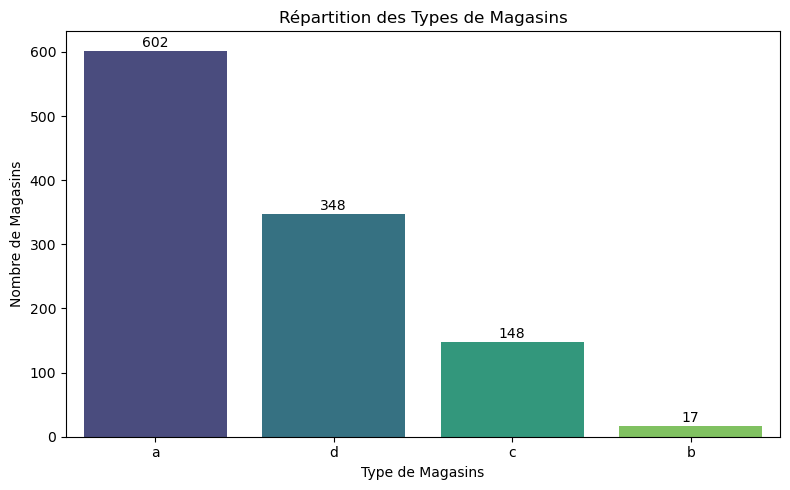

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt

# Préparer les données
store_counts = df_magasin['StoreType'].value_counts().sort_values(ascending=False).reset_index()
store_counts.columns = ['StoreType', 'Count']

# Création du graphique
plt.figure(figsize=(8, 5))
sns.barplot(data=store_counts, x='StoreType', y='Count', hue='StoreType', palette="viridis", legend=False)

# Ajout des titres
plt.title("Répartition des Types de Magasins")
plt.xlabel("Type de Magasins")
plt.ylabel("Nombre de Magasins")

# Afficher les valeurs sur les barres
for i, v in enumerate(store_counts['Count']):
    plt.text(i, v + 1, str(v), ha='center', va='bottom')

plt.tight_layout()
plt.show()


Dans notre jeu de données, nous distinguons quatre types de magasins : a, b, c et d. Chaque magasin dispose d’un assortiment identifié par une lettre : a pour un assortiment basique, b pour un assortiment large, et c pour un assortiment très large.

Afin d’améliorer la lisibilité et la compréhension des données, nous allons remplacer ces codes par des libellés explicites.

In [70]:
# Remplacer les codes par des libellés explicites
df_magasin['Assortment'] = df_magasin['Assortment'].replace({
    'a': 'Basique',
    'b': 'Large',
    'c': 'Très large'
})
print("Valeurs uniques dans la colonne 'Assortment' après remplacement :")
print(df_magasin['Assortment'].unique())


Valeurs uniques dans la colonne 'Assortment' après remplacement :
['Basique' 'Très large' 'Large']


In [71]:
# Nombre d’occurrences
assort_counts = df_magasin['Assortment'].value_counts()

# Pourcentage
assort_pct = df_magasin['Assortment'].value_counts(normalize=True) * 100

# Combiner dans un DataFrame
assort_stats = pd.DataFrame({
    'Nombre': assort_counts,
    'Pourcentage (%)': assort_pct.round(2)
})

# Affichage
print("Statistiques sur les types d'assortiment :")
print(assort_stats)

Statistiques sur les types d'assortiment :
            Nombre  Pourcentage (%)
Assortment                         
Basique        593            53.18
Très large     513            46.01
Large            9             0.81


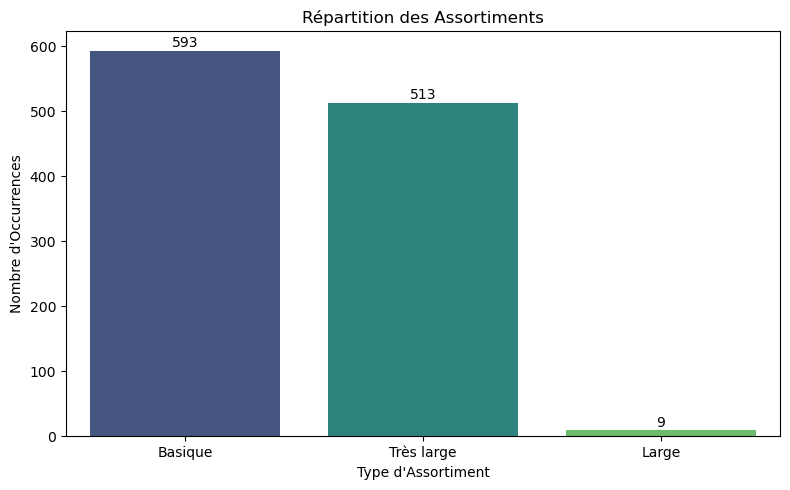

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns

# Transformer la Series en DataFrame
assort_counts = df_magasin['Assortment'].value_counts().reset_index()
assort_counts.columns = ['Assortment', 'Count']

# Graphique
plt.figure(figsize=(8, 5))
sns.barplot(data=assort_counts, x='Assortment', y='Count', hue='Assortment', palette="viridis", legend=False)

# Ajouter un titre et des labels
plt.title("Répartition des Assortiments")
plt.xlabel("Type d'Assortiment")
plt.ylabel("Nombre d'Occurrences")

# Afficher les valeurs sur les barres
for i, v in enumerate(assort_counts['Count']):
    plt.text(i, v + 1, str(v), ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [73]:
import pandas as pd

# Table des effectifs
table_effectifs = pd.crosstab(df_magasin['StoreType'], df_magasin['Assortment'])

# Table des pourcentages
table_pourcentages = pd.crosstab(df_magasin['StoreType'], df_magasin['Assortment'], normalize='index') * 100
table_pourcentages = table_pourcentages.round(2)

# Combinaison des deux tables
table_combinee = table_effectifs.astype(str) + " (" + table_pourcentages.astype(str) + "%)"

# Affichage
print("Effectifs et pourcentages des assortiments par type de magasin :")
print(table_combinee)


Effectifs et pourcentages des assortiments par type de magasin :
Assortment       Basique       Large    Très large
StoreType                                         
a           381 (63.29%)    0 (0.0%)  221 (36.71%)
b             7 (41.18%)  9 (52.94%)     1 (5.88%)
c            77 (52.03%)    0 (0.0%)   71 (47.97%)
d           128 (36.78%)    0 (0.0%)  220 (63.22%)


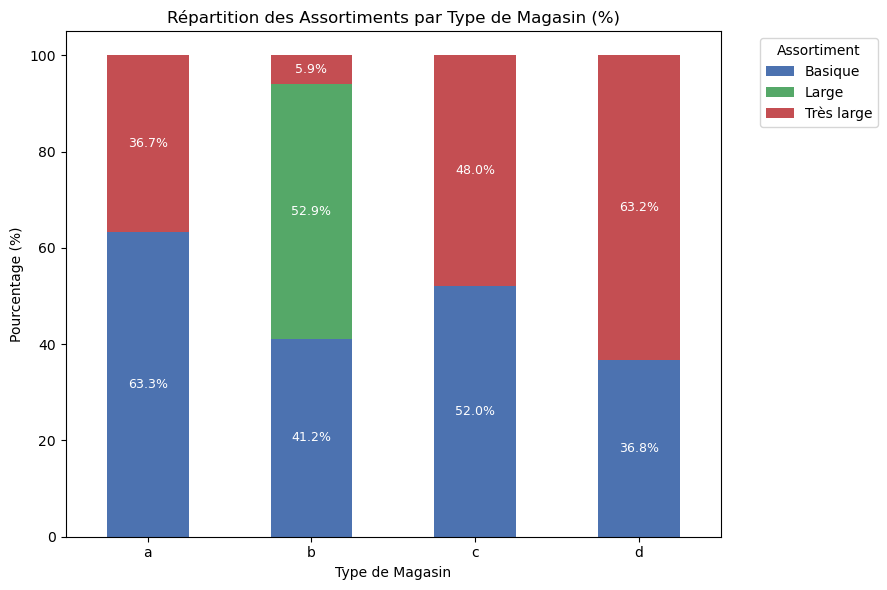

In [74]:
import matplotlib.pyplot as plt
import pandas as pd

# Tables des effectifs et pourcentages
table_effectifs = pd.crosstab(df_magasin['StoreType'], df_magasin['Assortment'])
table_pourcentages = pd.crosstab(df_magasin['StoreType'], df_magasin['Assortment'], normalize='index') * 100
table_pourcentages = table_pourcentages.round(2)

# Ordre souhaité
cols = ['Basique', 'Large', 'Très large']
table_effectifs = table_effectifs[cols]
table_pourcentages = table_pourcentages[cols]

# Palette manuelle plus lisible
palette = {
    'Basique': '#4C72B0',     # Bleu
    'Large': '#55A868',       # Vert
    'Très large': '#C44E52'   # Rouge foncé
}

# Tracé du graphique avec couleurs personnalisées
ax = table_pourcentages.plot(
    kind='bar',
    stacked=True,
    figsize=(9, 6),
    color=[palette[c] for c in cols]
)

# Affichage uniquement des pourcentages (si > 0)
for i, store_type in enumerate(table_effectifs.index):
    y_offset = 0
    for assort in cols:
        pct = table_pourcentages.loc[store_type, assort]
        if pct > 0:
            y_pos = y_offset + pct / 2
            ax.text(i, y_pos, f"{pct:.1f}%", ha='center', va='center', color='white', fontsize=9)
            y_offset += pct

# Mise en forme
plt.title("Répartition des Assortiments par Type de Magasin (%)")
plt.xlabel("Type de Magasin")
plt.ylabel("Pourcentage (%)")
plt.legend(title="Assortiment", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


In [75]:
# Moyenne des ventes (Sales)
moyenne_sales = df_merge['Sales'].mean()
# Affichage des résultats
print(f"Moyenne des ventes : {moyenne_sales:.2f}€")

Moyenne des ventes : 5773.82€


In [76]:
#Obtenir les distances maximales et minimales
CompetitionDistance_min = df_merge['CompetitionDistance'].min()
CompetitionDistance_max = df_merge['CompetitionDistance'].max()

print(f"Distance minimale : {CompetitionDistance_min} mètres")
print(f"Distance maximale : {CompetitionDistance_max} mètres")

Distance minimale : 20.0 mètres
Distance maximale : 75860.0 mètres


In [77]:
# Maximum et minimum des ventes (déjà calculé précédement, permet de faire une vérification)
max_sales = df_merge['Sales'].max()
min_sales = df_merge['Sales'].min()
print(f"Ventes maximales : {max_sales}€")
print(f"Ventes minimales : {min_sales}€")

Ventes maximales : 41551€
Ventes minimales : 0€


In [78]:
# Maximum et minimum des clients
max_customers = df_historique_vente['Customers'].max()
min_customers = df_historique_vente['Customers'].min()
print(f"Nombre maximum de clients : {max_customers}")
print(f"Nombre minimum de clients : {min_customers}")

Nombre maximum de clients : 7388
Nombre minimum de clients : 0


<div style="border: 1px solid #006400; padding: 10px; border-radius: 5px; margin-left: 20px;">
  <h3 style="color: #006400; margin: 0;">1.5 Indicateurs Statistiques</h3>
</div>

<div style="border: 1px solid #006400; padding: 10px; border-radius: 5px; margin-left: 40px;">
  <h4 style="color: #006400; margin: 0;">1.5.1 Indicateurs Statistiques par Visualisation</h4>
</div>

In [81]:
# Sélection des colonnes
stats = df_merge[['Sales', 'Customers']].describe()

# Formatage des colonnes
stats['Sales'] = stats['Sales'].map(lambda x: f"{x:,.0f}")
stats['Customers'] = stats['Customers'].map(lambda x: f"{x:,.0f}")

# Affichage
print(stats)

           Sales  Customers
count  1,017,209  1,017,209
mean       5,774        633
std        3,850        464
min            0          0
25%        3,727        405
50%        5,744        609
75%        7,856        837
max       41,551      7,388


In [82]:
import matplotlib.pyplot as plt

Le boxplot, ou boîte à moustaches, est un outil de visualisation faisant partie des mesures de dispersion. Il permet de représenter de manière synthétique la distribution d'une variable, tout en mettant en évidence sa dispersion. La boîte est délimitée par le premier quartile (Q1) et le troisième quartile (Q3), avec la médiane située au centre.

Ci-dessous, nous présentons une visualisation des données à l’aide d’un boxplot, accompagnée des calculs de la médiane et de l’écart-type de notre variable Sales, représentant le chiffre d’affaires.

In [84]:
#Calcul des valeurs statistiques:
Q1 = df_merge['Sales'].quantile(0.25)
median = df_merge['Sales'].median()
Q3 = df_merge['Sales'].quantile(0.75)
# Affichage avec deux décimales
print(f"Q1 = {Q1:.2f}")
print(f"Q3 = {Q3:.2f}")
print(f"Médiane = {median:.2f}")

Q1 = 3727.00
Q3 = 7856.00
Médiane = 5744.00


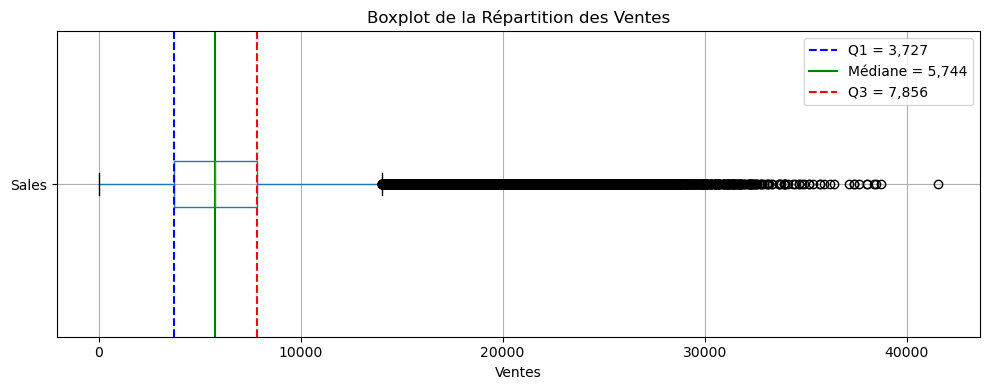

In [85]:
import matplotlib.pyplot as plt

# Calcul des valeurs statistiques pour 'Sales'
Q1 = df_merge['Sales'].quantile(0.25)
median = df_merge['Sales'].median()
Q3 = df_merge['Sales'].quantile(0.75)

# Création du boxplot horizontal pour la colonne 'Sales'
plt.figure(figsize=(10, 4))
df_merge.boxplot(column='Sales', vert=False)

# Titre et étiquette de l'axe
plt.title("Boxplot de la Répartition des Ventes")
plt.xlabel("Ventes")

# Lignes pour Q1, médiane et Q3
plt.axvline(x=Q1, color='blue', linestyle='--', label=f"Q1 = {Q1:,.0f}")
plt.axvline(x=median, color='green', linestyle='-', label=f"Médiane = {median:,.0f}")
plt.axvline(x=Q3, color='red', linestyle='--', label=f"Q3 = {Q3:,.0f}")

# Légende
plt.legend()
plt.tight_layout()
plt.show()


**Remarques**:
- Les points individuels situés au-delà des moustaches représentent des valeurs aberrantes (ou outliers). Il s’agit d’observations nettement éloignées du reste des données.
- Concernant les outliers, on observe des valeurs exceptionnellement élevées, susceptibles d’influencer certaines mesures statistiques, notamment la moyenne.
- La distance entre la médiane et le premier quartile (Q1) est plus courte que celle entre la médiane et le troisième quartile (Q3), ce qui suggère une asymétrie de la distribution vers les valeurs les plus élevées.
- Le chiffre d’affaires (CA) varie globalement entre une valeur proche de zéro et un maximum significativement élevé.
- La majorité du CA, correspondant à l’intervalle interquartile (entre Q1 et Q3), se situe entre 3 727€ et 7 856€.

<div style="border: 1px solid #006400; padding: 10px; border-radius: 5px; margin-left: 40px;">
  <h4 style="color: #006400; margin: 0;">1.5.2 Indicateurs Statistiques par Méthode Statistique</h4>
</div>

 **Identification par le Z-index**

In [89]:
# Affichage des résultats
print(f"Moyenne des ventes : {moyenne_sales:.2f}€")

Moyenne des ventes : 5773.82€


L’écart-type est, par définition, la racine carrée de la variance. Il s’agit d’une mesure de dispersion qui indique dans quelle mesure les valeurs d’un ensemble de données s’écartent, en moyenne, de la moyenne.

Un écart-type faible signifie que les valeurs sont globalement proches de la moyenne, tandis qu’un écart-type élevé reflète une plus grande variabilité des données autour de cette moyenne.

In [91]:
#Calculer l'écart-type du CA
standard_deviation = df_merge['Sales'].std()
#Arrondir à 2 chiffres apres la virgules:
standard_deviation = round(standard_deviation, 2)
# Affichage du résultat
print("L'écart-type des ventes est :", standard_deviation, "€")

L'écart-type des ventes est : 3849.93 €


Un écart-type élevé met en évidence une forte dispersion des ventes. 
Cela signifie que :
- certains magasins réalisent un chiffre d’affaires nettement supérieur à la moyenne,
- d’autres, au contraire, enregistrent des ventes bien en deçà
- les performances sont donc hétérogènes d’un magasin à l’autre.

In [93]:
# Calcul de la moyenne et de l'écart-type de la colonne Sales
mean = df_merge['Sales'].mean()
standard_deviation = df_merge['Sales'].std()

# Calcul du Z-score
df_merge = df_merge.copy() 
df_merge['z_score'] = (df_merge['Sales'] - mean) / standard_deviation

# Affichage des 5 premières lignes avec Z-score
print(df_merge[['Sales', 'z_score']].head())


   Sales   z_score
0   5263 -0.132683
1   5020 -0.195801
2   4782 -0.257620
3   5011 -0.198139
4   6102  0.085243


Ce code calcule le Z-score pour la variable Sales, ce qui permet d’identifier les valeurs atypiques (outliers). Le Z-score est une mesure statistique qui exprime, en nombre d’écarts-types, la distance d’une valeur donnée par rapport à la moyenne de la distribution.

Il est couramment utilisé pour détecter les valeurs inhabituelles.
- Un Z-score positif indique que la valeur est supérieure à la moyenne.
- Un Z-score négatif indique que la valeur est inférieure à la moyenne.
- Un Z-score proche de zéro signifie que la valeur est proche de la moyenne.

In [95]:
#Identification avec un z-score supérieur à 3 (pour détecter des valeurs aberrantes : des valeurs dont le Z-score est supérieur à 3 ou inférieur à -3 sont souvent considérées comme des valeurs aberrantes.)
# Calcul du seuil de CA pour un Z-score supérieur à 3:
Sales_seuil = mean + 3 * standard_deviation
# Affichage du seuil
Sales_seuil=round(Sales_seuil, 2)
print("Le seuil des ventes pour un Z-score supérieur à 3 est :", Sales_seuil, "€")

Le seuil des ventes pour un Z-score supérieur à 3 est : 17323.6 €


In [96]:
# Identifier les articles dont Sales est supérieur au seuil
df_Zscore_sup = df_merge[df_merge['Sales'] > Sales_seuil]

# Compter le nombre d'articles avec un Sales supérieur au seuil
nombre_Zscore_sup = df_Zscore_sup.shape[0]

# Afficher le résultat
print(f"Nombre d'articles avec un Sales au-dessus de {Sales_seuil}€ du seuil 3 : {nombre_Zscore_sup}")

Nombre d'articles avec un Sales au-dessus de 17323.6€ du seuil 3 : 9731


**Identification par l'interval interquartille**

In [98]:
# Calcul des statistiques descriptives
sales_desc = df_merge['Sales'].describe()

# Affichage formaté
print("Statistiques descriptives des ventes (€)\n")
print(f"Nombre d'observations : {int(sales_desc['count']):,}")
print(f"Moyenne               : {sales_desc['mean']:.2f} €")
print(f"Écart-type            : {sales_desc['std']:.2f} €")
print(f"Minimum               : {sales_desc['min']:.2f} €")
print(f"1er quartile (25%)    : {sales_desc['25%']:.2f} €")
print(f"Médiane (50%)         : {sales_desc['50%']:.2f} €")
print(f"3e quartile (75%)     : {sales_desc['75%']:.2f} €")
print(f"Maximum               : {sales_desc['max']:.2f} €")


Statistiques descriptives des ventes (€)

Nombre d'observations : 1,017,209
Moyenne               : 5773.82 €
Écart-type            : 3849.93 €
Minimum               : 0.00 €
1er quartile (25%)    : 3727.00 €
Médiane (50%)         : 5744.00 €
3e quartile (75%)     : 7856.00 €
Maximum               : 41551.00 €


In [99]:
# Définir un seuil pour les articles "outliers" en CA
# Calcul des quartiles
Q1 = df_merge['Sales'].quantile(0.25)
Q3 = df_merge['Sales'].quantile(0.75)

# Calcul de l'IQR (Interquartile Range)
IQR = Q3 - Q1

# Définition des seuils pour identifier les outliers
seuil_inferieur = Q1 - 1.5 * IQR
seuil_superieur = Q3 + 1.5 * IQR

# Identification des outliers
outliers = df_merge[(df_merge['Sales'] < seuil_inferieur) | (df_merge['Sales'] > seuil_superieur)]

# Affichage des résultats
print("Seuil inférieur :", seuil_inferieur)
print("Seuil supérieur :", seuil_superieur)

# Nombre d'outliers
nombre_outliers = outliers.shape[0]
print(f"Nombre d'articles considérés comme outliers : {nombre_outliers}")


Seuil inférieur : -2466.5
Seuil supérieur : 14049.5
Nombre d'articles considérés comme outliers : 26694


In [100]:
# Définir le nombre d'articles et la proportion de l'ensemble du catalogue "outliers" pour df_merge et la colonne 'Sales'
# Nombre total d'articles dans l'ensemble du catalogue
nombre_total_articles = df_merge.shape[0]

# Nombre d'articles "outliers"
nombre_outliers = outliers.shape[0]

# Proportion des outliers dans l'ensemble du catalogue
proportion_outliers = nombre_outliers / nombre_total_articles

# Affichage des résultats
print("Nombre total d'articles :", nombre_total_articles)
print("Nombre d'articles 'outliers' :", nombre_outliers)
print("Proportion des 'outliers' : {:.2f}%".format(proportion_outliers * 100))

Nombre total d'articles : 1017209
Nombre d'articles 'outliers' : 26694
Proportion des 'outliers' : 2.62%


En conclusion, nous avons un nombre très faible d'articles considérés comme outliers.

<div style="border: 1px solid #006400; padding: 10px; border-radius: 5px; margin-left: 20px;">
  <h3 style="color: #006400; margin: 0;">1.6  Visualisation de la Distribution des Données: Test de Normalité</h3>
</div>

Un test de normalité est un test statistique permettant de déterminer si un ensemble de données suit une distribution normale.
La distribution normale, également appelée loi de Gauss, est une courbe en cloche symétrique, centrée autour de la moyenne, avec la majorité des valeurs regroupées autour de celle-ci.

Vérifier la normalité est une étape essentielle, car de nombreuses méthodes statistiques reposent sur l’hypothèse que les données suivent une distribution normale.

Hypothèses du test
- H₀ (hypothèse nulle) : les données suivent une distribution normale.
- H₁ (hypothèse alternative) : les données ne suivent pas une distribution normale.

Interprétation de la p-value
- Si p-value < 0,05 : on rejette H₀, ce qui indique que les données ne suivent pas une distribution normale.
- Si p-value ≥ 0,05 : on ne rejette pas H₀, ce qui suggère que les données peuvent être considérées comme normales.



In [104]:
# Importer la bibliothèque scipy
from scipy import stats

# Regrouper par assortiment et sommer les ventes
volume_par_assortiment = df_merge.groupby('Assortment')['Sales'].sum().reset_index()

# Test de Kolmogorov-Smirnov sur la colonne 'Sales' avec une distribution normale
ks_test = stats.kstest(volume_par_assortiment['Sales'], 'norm', args=(volume_par_assortiment['Sales'].mean(), volume_par_assortiment['Sales'].std()))

# Affichage des résultats
print('Statistique de test Kolmogorov-Smirnov:', ks_test.statistic)
print('p-value:', ks_test.pvalue)

Statistique de test Kolmogorov-Smirnov: 0.3754486979750679
p-value: 0.6628191331131819


**Test de Kolmogorov-Smirnov**

Le test de Kolmogorov-Smirnov permet de comparer la distribution empirique d’un échantillon à une distribution normale théorique. Il est utilisé pour évaluer si les données suivent une loi normale.

Hypothèses du test :
- H₀ (hypothèse nulle) : les données suivent une distribution normale.
- H₁ (hypothèse alternative) : les données ne suivent pas une distribution normale.

Résultats :
- Statistique du test : 0.375
- p-value : 0.663

**Interprétation**:
Avec une p-value de 0.663, nettement supérieure au seuil de 0,05, il n’y a pas suffisamment de preuves pour rejeter l’hypothèse nulle. Cela signifie que rien ne permet d’affirmer que les données ne suivent pas une distribution normale.

En conclusion, selon le test de Kolmogorov-Smirnov, les ventes par assortiment semblent suivre une distribution normale.

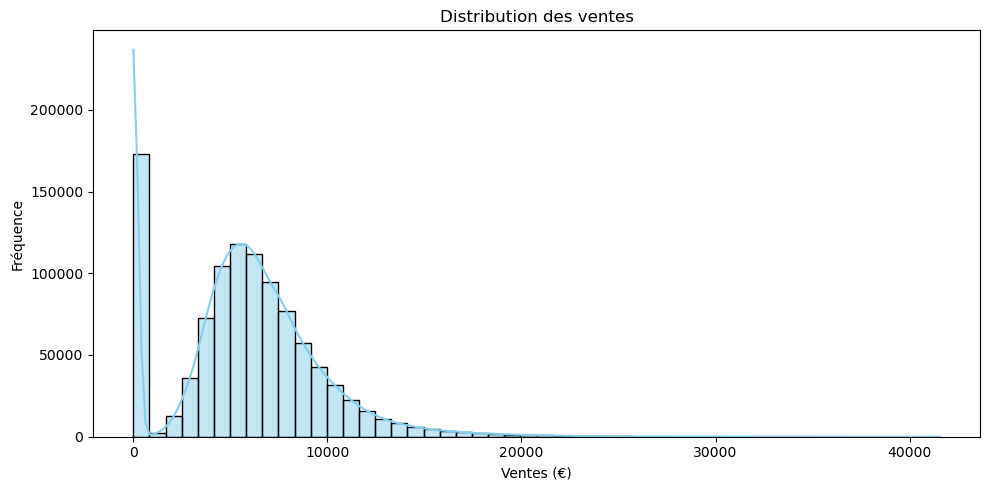

In [106]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.histplot(df_merge['Sales'], bins=50, kde=True, color='skyblue')
plt.title("Distribution des ventes")
plt.xlabel("Ventes (€)")
plt.ylabel("Fréquence")
plt.tight_layout()
plt.show()


In [107]:
df_merge.dtypes

Store                                 int64
StoreType                            object
Assortment                           object
CompetitionDistance                 float64
CompetitionOpenSinceMonth           float64
CompetitionOpenSinceYear            float64
Promo2                                int64
Promo2SinceWeek                     float64
Promo2SinceYear                     float64
PromoInterval                        object
DayOfWeek                             int64
Date                         datetime64[ns]
Sales                                 int64
Customers                             int64
Open                                  int64
Promo                                 int64
StateHoliday                         object
SchoolHoliday                         int64
z_score                             float64
dtype: object

In [108]:
# Supprimer la colonne 'z_score' du DataFrame
df_merge = df_merge.drop(columns=['z_score'])
# Vérifier que la colonne a été supprimée
print(df_merge.head())

   Store StoreType Assortment  CompetitionDistance  CompetitionOpenSinceMonth  \
0      1         c          a               1270.0                        9.0   
1      1         c          a               1270.0                        9.0   
2      1         c          a               1270.0                        9.0   
3      1         c          a               1270.0                        9.0   
4      1         c          a               1270.0                        9.0   

   CompetitionOpenSinceYear  Promo2  Promo2SinceWeek  Promo2SinceYear  \
0                    2008.0       0              0.0              0.0   
1                    2008.0       0              0.0              0.0   
2                    2008.0       0              0.0              0.0   
3                    2008.0       0              0.0              0.0   
4                    2008.0       0              0.0              0.0   

      PromoInterval  DayOfWeek       Date  Sales  Customers  Open  Promo  

<div style="border: 1px solid #006400; background-color: #e6f4ea; padding: 10px; border-radius: 5px;">
  <h2 style="color: #006400; margin: 0;">2. Caractériser les Différentes Typologies de Magasin</h2>
</div>

<div style="border: 1px solid #006400; padding: 10px; border-radius: 5px; margin-left: 20px;">
  <h3 style="color: #006400; margin: 0;">2.1 Comparer les Volumes de Vente au Mois et à l'Année des Magasins</h3>
</div>

<div style="border: 1px solid #006400; padding: 10px; border-radius: 5px; margin-left: 40px;">
  <h4 style="color: #006400; margin: 0;">2.1.1 Evolution Globale</h4>
</div>

In [112]:
#Pour rappel:
print(store_stats)
print(f"Nombre total de magasins : {df_magasin['StoreType'].count()}")

           Nombre  Pourcentage (%)
StoreType                         
a             602            53.99
d             348            31.21
c             148            13.27
b              17             1.52
Nombre total de magasins : 1115


In [113]:
#Vérification des formats des variables
df_merge['Date'] = pd.to_datetime(df_merge['Date'])

In [114]:
#Création de nouvelles colonnes : Extraire le mois et l'année de la date pour chaque vente. 
df_merge['Year'] = df_merge['Date'].dt.year
df_merge['Month'] = df_merge['Date'].dt.month

# Afficher les 5 premières lignes pour vérifier les nouvelles colonnes
print(df_merge[['Date', 'Year', 'Month']].head())

        Date  Year  Month
0 2015-07-31  2015      7
1 2015-07-30  2015      7
2 2015-07-29  2015      7
3 2015-07-28  2015      7
4 2015-07-27  2015      7


In [115]:
#Calculer les volumes de vente totaux par magasin, par mois et par année.
ventes_mensuelles = df_merge.groupby(['Store', 'Year', 'Month'])['Sales'].sum().reset_index()
ventes_annuelles = df_merge.groupby(['Store', 'Year'])['Sales'].sum().reset_index()

In [116]:
#érification des volumes mensuels de vente par magasin
print("\nVolumes de vente mensuels par magasin (extrait) :")
print(ventes_mensuelles.head())


Volumes de vente mensuels par magasin (extrait) :
   Store  Year  Month   Sales
0      1  2013      1  128431
1      1  2013      2  125271
2      1  2013      3  145169
3      1  2013      4  118009
4      1  2013      5  118225


In [117]:
#Vérification des volumes annuels de vente par magasin:
print("\nVolumes de vente annuels par magasin (extrait) :")
print(ventes_annuelles.head())


Volumes de vente annuels par magasin (extrait) :
   Store  Year    Sales
0      1  2013  1491140
1      1  2014  1433408
2      1  2015   792306
3      2  2013  1488164
4      2  2014  1516432


In [118]:
# Regrouper par type de magasin 
# Ventes mensuelles par type
ventes_mensuelles_typo = df_merge.groupby(['StoreType', 'Year', 'Month'])['Sales'].sum().reset_index()
# Ventes annuelles par type
ventes_annuelles_typo = df_merge.groupby(['StoreType', 'Year'])['Sales'].sum().reset_index()

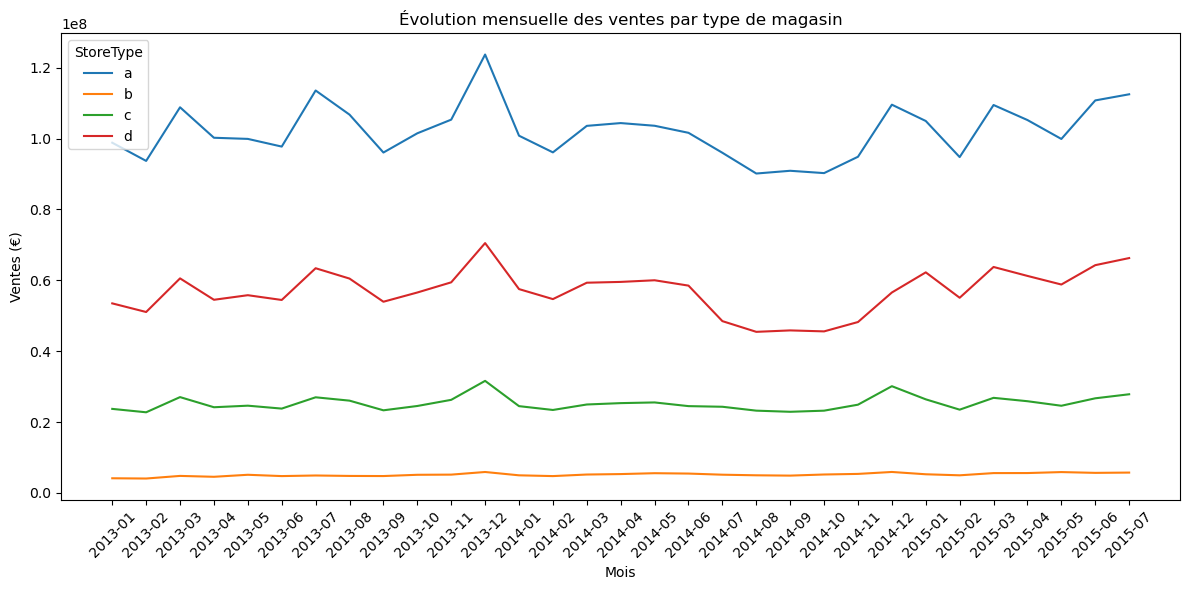

In [119]:
import seaborn as sns
import matplotlib.pyplot as plt

# Créer une colonne "Year-Month" pour lisibilité
df_merge['YearMonth'] = df_merge['Date'].dt.to_period('M').astype(str)

ventes_mensuelles_typo = df_merge.groupby(['StoreType', 'YearMonth'])['Sales'].sum().reset_index()

#Graphique
plt.figure(figsize=(12, 6))
sns.lineplot(data=ventes_mensuelles_typo, x='YearMonth', y='Sales', hue='StoreType')
plt.title("Évolution mensuelle des ventes par type de magasin")
plt.xlabel("Mois")
plt.ylabel("Ventes (€)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

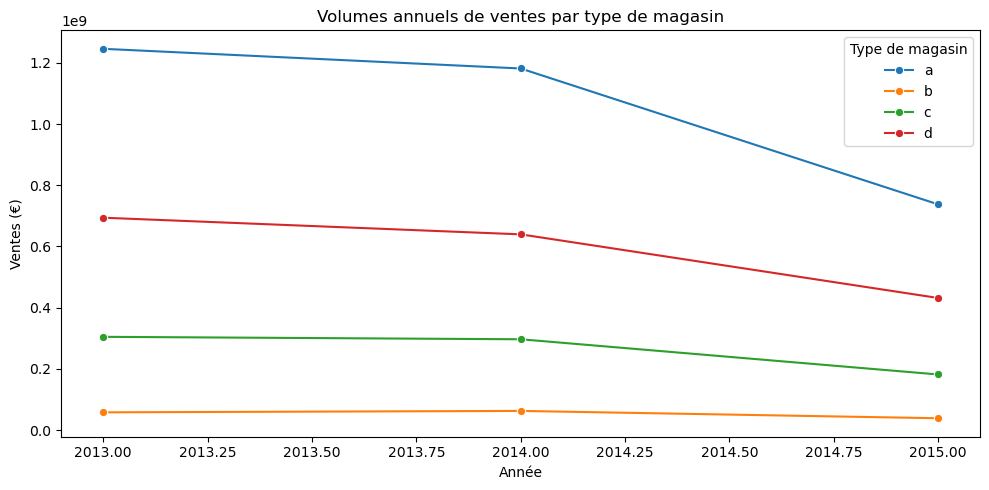

In [120]:
import seaborn as sns
import matplotlib.pyplot as plt

# Agrégation annuelle par type de magasin
ventes_annuelles_type = df_merge.groupby(['StoreType', 'Year'])['Sales'].sum().reset_index()

# Graphique en courbe
plt.figure(figsize=(10, 5))
sns.lineplot(data=ventes_annuelles_type, x='Year', y='Sales', hue='StoreType', marker='o')

plt.title("Volumes annuels de ventes par type de magasin")
plt.xlabel("Année")
plt.ylabel("Ventes (€)")
plt.legend(title="Type de magasin")
plt.tight_layout()
plt.show()

In [121]:
# Étape 1 : Regrouper les ventes annuelles par type de magasin
ventes_annuelles = df_merge.groupby(['StoreType', 'Year'])['Sales'].sum().reset_index()

# Étape 2 : Calcul du % d’évolution d’une année sur l’autre, par type de magasin
ventes_annuelles['Pct_Evolution'] = ventes_annuelles.groupby('StoreType')['Sales'].pct_change() * 100

# Affichage du tableau
print("Évolution annuelle des ventes (%) par type de magasin :")
print(ventes_annuelles)

# Étape 3 : Calcul global des ventes annuelles tous types de magasins
ventes_global = df_merge.groupby('Year')['Sales'].sum().reset_index()
ventes_global['Pct_Evolution'] = ventes_global['Sales'].pct_change() * 100

print("\nÉvolution annuelle globale des ventes (%) :")
print(ventes_global)


Évolution annuelle des ventes (%) par type de magasin :
   StoreType  Year       Sales  Pct_Evolution
0          a  2013  1246063027            NaN
1          a  2014  1181741424      -5.161986
2          a  2015   737530408     -37.589527
3          b  2013    57966559            NaN
4          b  2014    62615162       8.019457
5          b  2015    38649674     -38.274257
6          c  2013   304755298            NaN
7          c  2014   296773142      -2.619202
8          c  2015   181692986     -38.777146
9          d  2013   694091200            NaN
10         d  2014   639675168      -7.839897
11         d  2015   431626575     -32.524100

Évolution annuelle globale des ventes (%) :
   Year       Sales  Pct_Evolution
0  2013  2302876084            NaN
1  2014  2180804896      -5.300814
2  2015  1389499643     -36.285009


Nous constatons une baisse significative des ventes à partir de l’année 2014, affectant l’ensemble des quatre types de magasins. Afin de mieux comprendre cette évolution, nous allons désormais analyser les résultats en détail, par type de magasin.

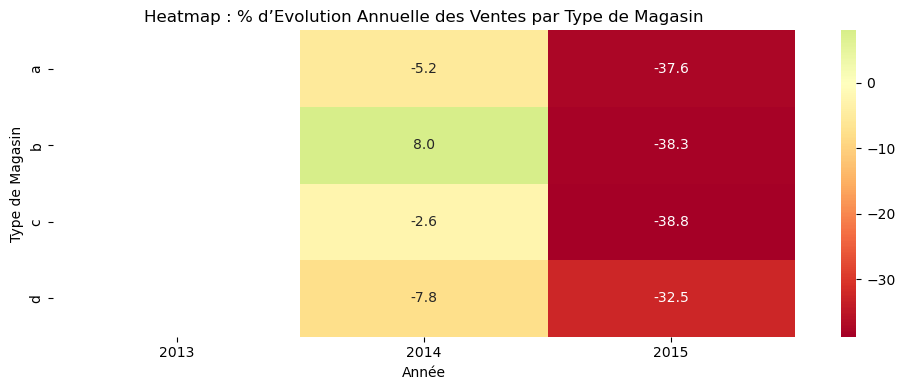

In [123]:
#Création d'un visuel pour comparer les pourcentages entre chaque type de Magasin.
pivot_heatmap = ventes_annuelles.pivot(index='StoreType', columns='Year', values='Pct_Evolution')

plt.figure(figsize=(10, 4))
sns.heatmap(pivot_heatmap, annot=True, fmt=".1f", cmap='RdYlGn', center=0)
plt.title("Heatmap : % d’Evolution Annuelle des Ventes par Type de Magasin")
plt.xlabel("Année")
plt.ylabel("Type de Magasin")
plt.tight_layout()
plt.show()

**Interpretation**:
L’analyse des volumes de ventes sur la période 2013 à 2015 révèle une baisse généralisée du chiffre d’affaires, aussi bien à l’échelle globale que par type de magasin.

À l’échelle globale, les ventes diminuent de -5,3 % en 2014, puis chutent fortement de -36,3 % en 2015.

Cette dynamique se retrouve dans l’ensemble des types de magasins, avec une accentuation marquée du recul en 2015 :

- Magasins de type a : -5,2 % (2014), puis -37,6 % (2015)
- Magasins de type b : +8,0 % (2014), puis -38,3 % (2015)
- Magasins de type c : -2,6 % (2014), puis -38,8 % (2015)
- Magasins de type d : -7,8 % (2014), puis -32,5 % (2015)

Cette évolution traduit une tendance de déclin marquée à partir de 2014, quelle que soit la typologie de magasin, avec une rupture particulièrement prononcée en 2015.

<div style="border: 1px solid #006400; padding: 10px; border-radius: 5px; margin-left: 40px;">
  <h4 style="color: #006400; margin: 0;">2.1.2 Evolution par Type de Magasin</h4>
</div>

In [126]:
# Filtrer les données pour le type de magasin 'a'
df_magasin_a = df_merge[df_merge['StoreType'] == 'a']
df_magasin_b = df_merge[df_merge['StoreType'] == 'b']
df_magasin_c = df_merge[df_merge['StoreType'] == 'c']
df_magasin_d = df_merge[df_merge['StoreType'] == 'd']

<div style="border: 1px solid #006400; padding: 10px; border-radius: 5px; margin-left: 60px;">
  <h5 style="color: #006400; margin: 0;"> Magasin "a"</h5>
</div>


In [128]:
# Agrégation annuelle des ventes pour le magasin A
ventes_annuelles_a = df_magasin_a.groupby('Year')['Sales'].sum().reset_index()
print("Ventes annuelles - Magasin A :\n", ventes_annuelles_a)


Ventes annuelles - Magasin A :
    Year       Sales
0  2013  1246063027
1  2014  1181741424
2  2015   737530408


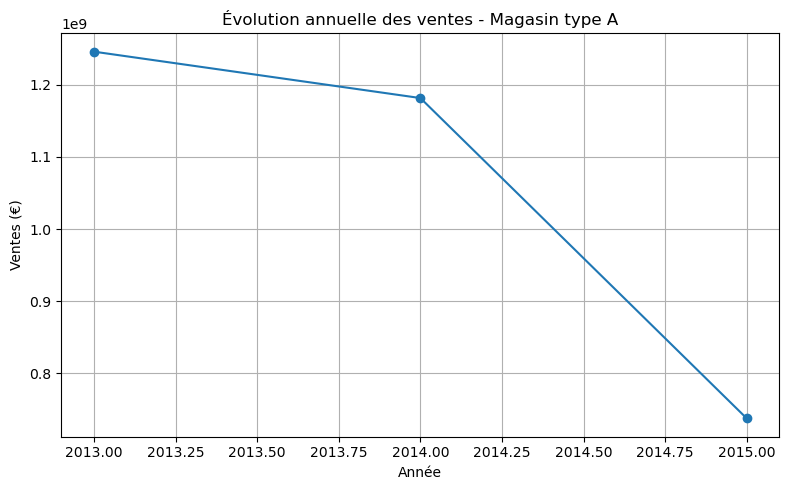

In [129]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.plot(ventes_annuelles_a['Year'], ventes_annuelles_a['Sales'], marker='o', linestyle='-')
plt.title("Évolution annuelle des ventes - Magasin type A")
plt.xlabel("Année")
plt.ylabel("Ventes (€)")
plt.grid(True)
plt.tight_layout()
plt.show()

In [130]:
stats_a = df_magasin_a['Sales'].describe()
print("Statistiques des ventes - Magasin A :\n", stats_a)

Statistiques des ventes - Magasin A :
 count    551627.000000
mean       5738.179710
std        3964.028134
min           0.000000
25%        3508.000000
50%        5618.000000
75%        7860.000000
max       41551.000000
Name: Sales, dtype: float64


In [131]:
print("Moyenne :", df_magasin_a['Sales'].mean())
print("Médiane :", df_magasin_a['Sales'].median())
print("Écart-type :", df_magasin_a['Sales'].std())


Moyenne : 5738.179710202728
Médiane : 5618.0
Écart-type : 3964.0281342368994


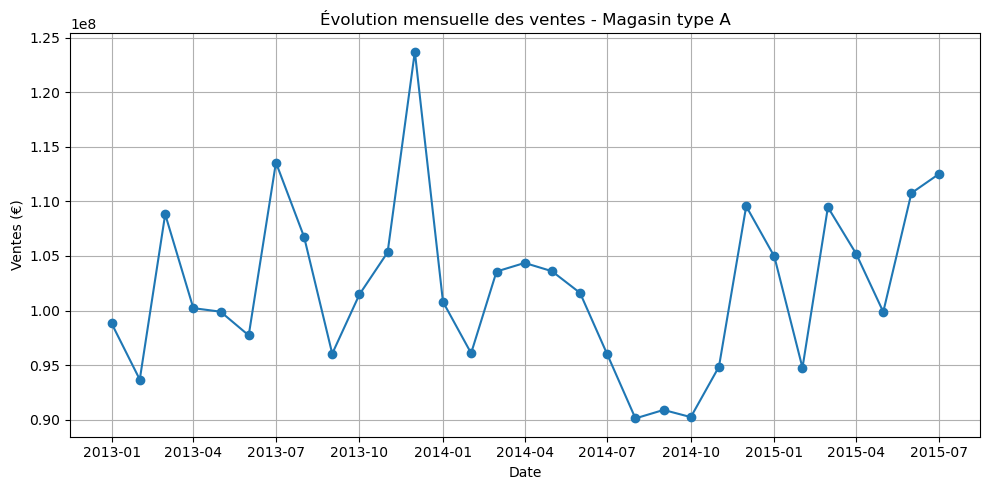

In [132]:
# Ventes mensuelles pour le magasin de type 'a'
ventes_mensuelles_a = df_magasin_a.groupby(['Year', 'Month'])['Sales'].sum().reset_index()

# Création d'une colonne date pour la courbe
ventes_mensuelles_a['Date'] = pd.to_datetime(ventes_mensuelles_a[['Year', 'Month']].assign(DAY=1))

# Tracé
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(ventes_mensuelles_a['Date'], ventes_mensuelles_a['Sales'], marker='o')
plt.title("Évolution mensuelle des ventes - Magasin type A")
plt.xlabel("Date")
plt.ylabel("Ventes (€)")
plt.grid(True)
plt.tight_layout()
plt.show()


<div style="border: 1px solid #006400; padding: 10px; border-radius: 5px; margin-left: 60px;">
  <h5 style="color: #006400; margin: 0;"> Magasin "b"</h5>
</div>


Ventes annuelles - Magasin B :
    Year     Sales
0  2013  57966559
1  2014  62615162
2  2015  38649674


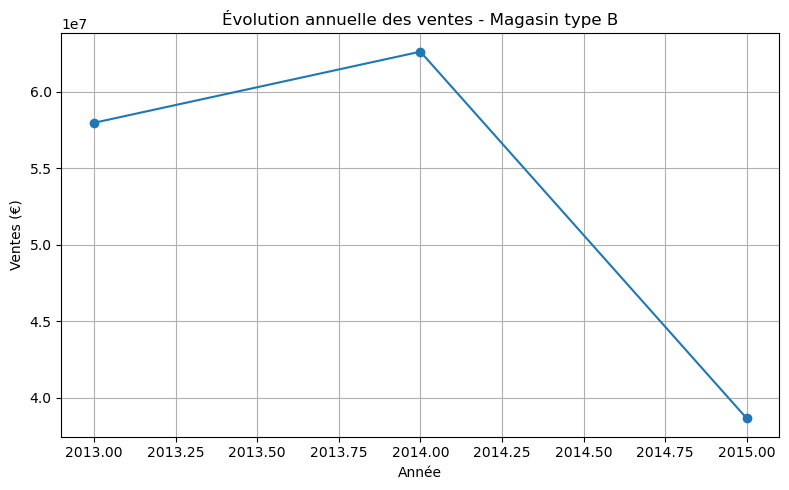

Statistiques des ventes - Magasin B :
 count    15830.000000
mean     10058.837334
std       5280.525506
min          0.000000
25%       6227.000000
50%       9025.500000
75%      13082.750000
max      38722.000000
Name: Sales, dtype: float64
Moyenne : 10058.837334175616
Médiane : 9025.5
Écart-type : 5280.525505897126


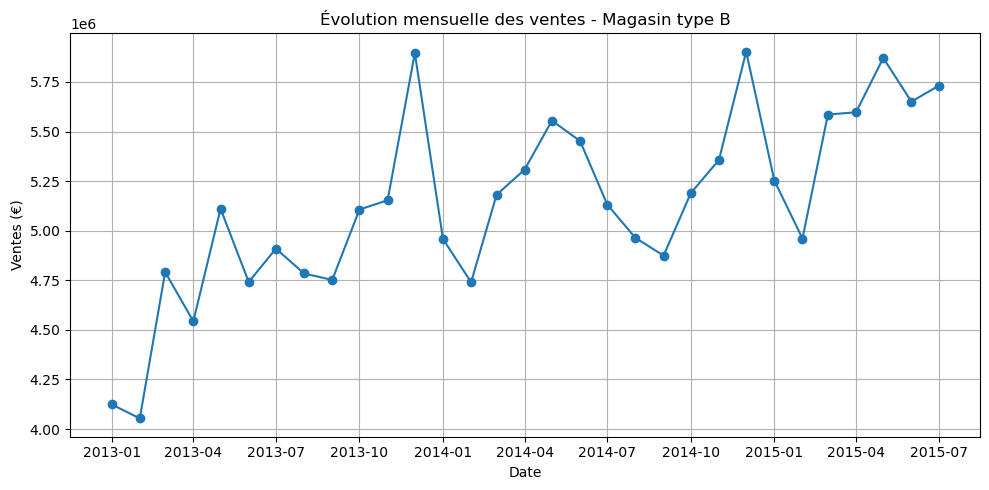

In [134]:
# Agrégation annuelle des ventes pour le magasin B
ventes_annuelles_b = df_magasin_b.groupby('Year')['Sales'].sum().reset_index()
print("Ventes annuelles - Magasin B :\n", ventes_annuelles_b)

# Visualisation de l'évolution annuelle des ventes
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.plot(ventes_annuelles_b['Year'], ventes_annuelles_b['Sales'], marker='o', linestyle='-')
plt.title("Évolution annuelle des ventes - Magasin type B")
plt.xlabel("Année")
plt.ylabel("Ventes (€)")
plt.grid(True)
plt.tight_layout()
plt.show()

# Statistiques descriptives des ventes - Magasin B
stats_b = df_magasin_b['Sales'].describe()
print("Statistiques des ventes - Magasin B :\n", stats_b)
print("Moyenne :", df_magasin_b['Sales'].mean())
print("Médiane :", df_magasin_b['Sales'].median())
print("Écart-type :", df_magasin_b['Sales'].std())

# Ventes mensuelles pour le magasin de type 'B'
ventes_mensuelles_b = df_magasin_b.groupby(['Year', 'Month'])['Sales'].sum().reset_index()

# Création d'une colonne date pour la courbe
ventes_mensuelles_b['Date'] = pd.to_datetime(ventes_mensuelles_b[['Year', 'Month']].assign(DAY=1))

# Tracé de l'évolution mensuelle des ventes
plt.figure(figsize=(10,5))
plt.plot(ventes_mensuelles_b['Date'], ventes_mensuelles_b['Sales'], marker='o')
plt.title("Évolution mensuelle des ventes - Magasin type B")
plt.xlabel("Date")
plt.ylabel("Ventes (€)")
plt.grid(True)
plt.tight_layout()
plt.show()


<div style="border: 1px solid #006400; padding: 10px; border-radius: 5px; margin-left: 60px;">
  <h5 style="color: #006400; margin: 0;"> Magasin "c"</h5>
</div>


Ventes annuelles - Magasin C :
    Year      Sales
0  2013  304755298
1  2014  296773142
2  2015  181692986


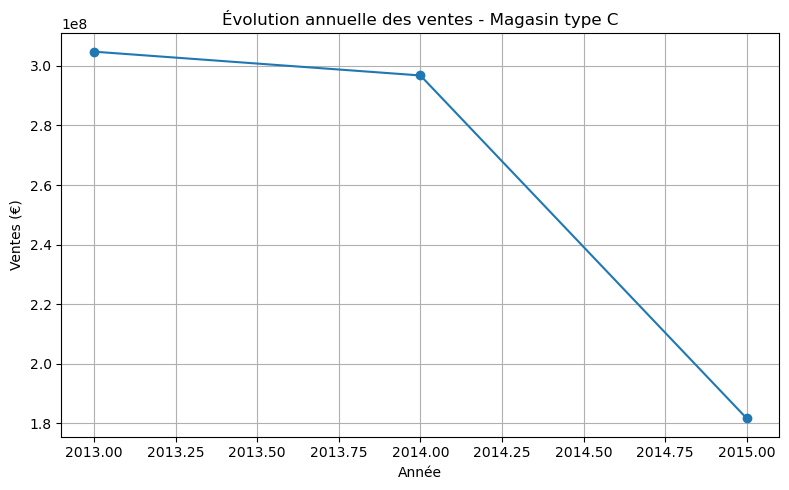

Statistiques des ventes - Magasin C :
 count    136840.000000
mean       5723.629246
std        3721.700886
min           0.000000
25%        3789.000000
50%        5766.000000
75%        7849.000000
max       31448.000000
Name: Sales, dtype: float64
Moyenne : 5723.6292458345515
Médiane : 5766.0
Écart-type : 3721.700886073673


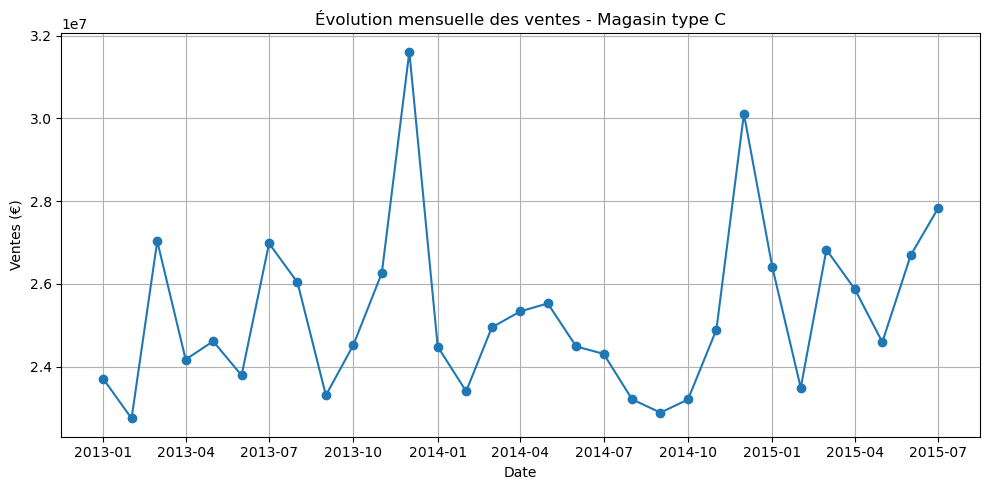

In [136]:
# Agrégation annuelle des ventes pour le magasin C
ventes_annuelles_c = df_magasin_c.groupby('Year')['Sales'].sum().reset_index()
print("Ventes annuelles - Magasin C :\n", ventes_annuelles_c)

# Visualisation de l'évolution annuelle des ventes
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.plot(ventes_annuelles_c['Year'], ventes_annuelles_c['Sales'], marker='o', linestyle='-')
plt.title("Évolution annuelle des ventes - Magasin type C")
plt.xlabel("Année")
plt.ylabel("Ventes (€)")
plt.grid(True)
plt.tight_layout()
plt.show()

# Statistiques descriptives des ventes - Magasin C
stats_c = df_magasin_c['Sales'].describe()
print("Statistiques des ventes - Magasin C :\n", stats_c)
print("Moyenne :", df_magasin_c['Sales'].mean())
print("Médiane :", df_magasin_c['Sales'].median())
print("Écart-type :", df_magasin_c['Sales'].std())

# Ventes mensuelles pour le magasin de type 'C'
ventes_mensuelles_c = df_magasin_c.groupby(['Year', 'Month'])['Sales'].sum().reset_index()

# Création d'une colonne date pour la courbe
ventes_mensuelles_c['Date'] = pd.to_datetime(ventes_mensuelles_c[['Year', 'Month']].assign(DAY=1))

# Tracé de l'évolution mensuelle des ventes
plt.figure(figsize=(10,5))
plt.plot(ventes_mensuelles_c['Date'], ventes_mensuelles_c['Sales'], marker='o')
plt.title("Évolution mensuelle des ventes - Magasin type C")
plt.xlabel("Date")
plt.ylabel("Ventes (€)")
plt.grid(True)
plt.tight_layout()
plt.show()


<div style="border: 1px solid #006400; padding: 10px; border-radius: 5px; margin-left: 60px;">
  <h5 style="color: #006400; margin: 0;"> Magasin "d"</h5>
</div>

Ventes annuelles - Magasin D :
    Year      Sales
0  2013  694091200
1  2014  639675168
2  2015  431626575


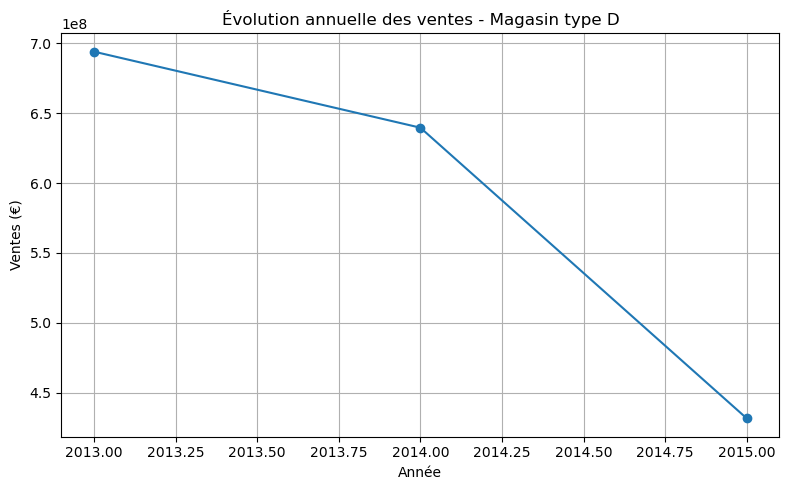

Statistiques des ventes - Magasin D :
 count    312912.000000
mean       5641.819243
std        3473.393781
min           0.000000
25%        3986.000000
50%        5826.000000
75%        7691.000000
max       38037.000000
Name: Sales, dtype: float64
Moyenne : 5641.819243109884
Médiane : 5826.0
Écart-type : 3473.393781201215


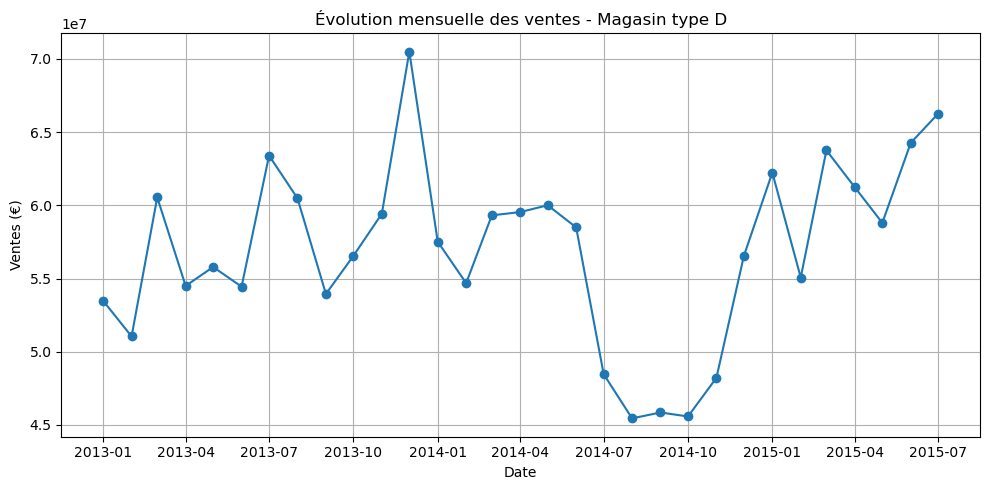

In [138]:
# Agrégation annuelle des ventes pour le magasin D
ventes_annuelles_d = df_magasin_d.groupby('Year')['Sales'].sum().reset_index()
print("Ventes annuelles - Magasin D :\n", ventes_annuelles_d)

# Visualisation de l'évolution annuelle des ventes
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.plot(ventes_annuelles_d['Year'], ventes_annuelles_d['Sales'], marker='o', linestyle='-')
plt.title("Évolution annuelle des ventes - Magasin type D")
plt.xlabel("Année")
plt.ylabel("Ventes (€)")
plt.grid(True)
plt.tight_layout()
plt.show()

# Statistiques descriptives des ventes - Magasin D
stats_d = df_magasin_d['Sales'].describe()
print("Statistiques des ventes - Magasin D :\n", stats_d)
print("Moyenne :", df_magasin_d['Sales'].mean())
print("Médiane :", df_magasin_d['Sales'].median())
print("Écart-type :", df_magasin_d['Sales'].std())

# Ventes mensuelles pour le magasin de type 'D'
ventes_mensuelles_d = df_magasin_d.groupby(['Year', 'Month'])['Sales'].sum().reset_index()

# Création d'une colonne date pour la courbe
ventes_mensuelles_d['Date'] = pd.to_datetime(ventes_mensuelles_d[['Year', 'Month']].assign(DAY=1))

# Tracé de l'évolution mensuelle des ventes
plt.figure(figsize=(10,5))
plt.plot(ventes_mensuelles_d['Date'], ventes_mensuelles_d['Sales'], marker='o')
plt.title("Évolution mensuelle des ventes - Magasin type D")
plt.xlabel("Date")
plt.ylabel("Ventes (€)")
plt.grid(True)
plt.tight_layout()
plt.show()


La baisse des ventes observée dès la fin 2013 et au début 2014, commune à tous les types de magasins, se prolonge de manière accentuée en 2015. Cette dynamique synchronisée suggère l’influence d’un facteur externe affectant l’ensemble du réseau, tel qu’une intensification de la concurrence, une diminution des efforts promotionnels ou une baisse de la fréquentation client.

<div style="border: 1px solid #006400; padding: 10px; border-radius: 5px; margin-left: 40px;">
  <h4 style="color: #006400; margin: 0;">2.1.3 Analyse des Ventes</h4>
</div>

In [141]:
df_merge.columns.tolist()

['Store',
 'StoreType',
 'Assortment',
 'CompetitionDistance',
 'CompetitionOpenSinceMonth',
 'CompetitionOpenSinceYear',
 'Promo2',
 'Promo2SinceWeek',
 'Promo2SinceYear',
 'PromoInterval',
 'DayOfWeek',
 'Date',
 'Sales',
 'Customers',
 'Open',
 'Promo',
 'StateHoliday',
 'SchoolHoliday',
 'Year',
 'Month',
 'YearMonth']

Plusieurs variables présentes dans notre jeu de données pourraient contribuer à expliquer la diminution des ventes observée à partir de 2014 :

- Customers : Une diminution du nombre de clients pourrait refléter une baisse de fréquentation des magasins à partir de 2014.
- Promo : Une réduction du nombre de promotions, notamment fin 2013 et en 2014, pourrait avoir affecté l’attractivité commerciale.
- CompetitionDistance : L’apparition de concurrents plus proches (réduction de la distance à la concurrence) pourrait avoir entraîné une perte de parts de marché.

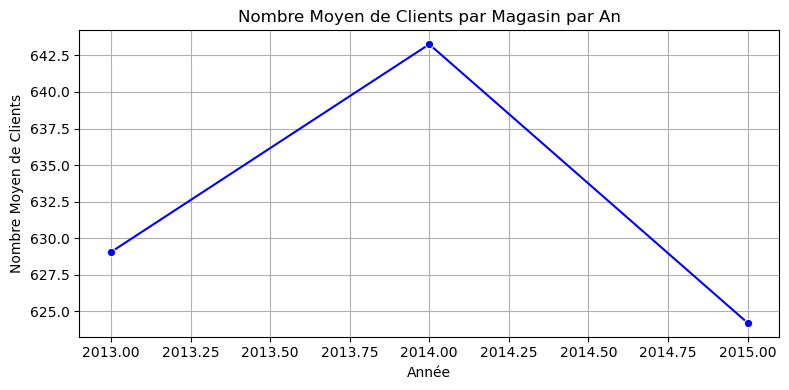

In [143]:
#Évolution du nombre de clients par année:
# Nombre moyen de clients par jour et par année
clients_par_an = df_merge.groupby('Year')['Customers'].mean().reset_index()

plt.figure(figsize=(8, 4))
sns.lineplot(data=clients_par_an, x='Year', y='Customers', marker='o', color='blue')
plt.title("Nombre Moyen de Clients par Magasin par An")
plt.ylabel("Nombre Moyen de Clients")
plt.xlabel("Année")
plt.grid(True)
plt.tight_layout()
plt.show()


**Interprétation**:
Nous pouvons constater une baisse importante de nombre moyen de clients par magasin par an à partir de 2014.

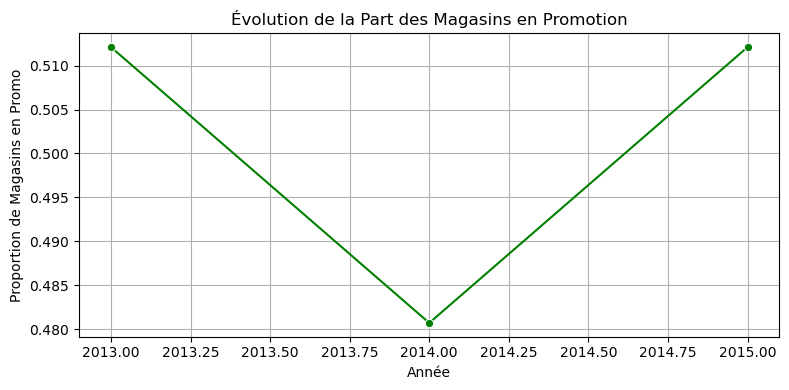

In [145]:
#Évolution des Promotions (Promo2) par année
# Part des magasins en promotion chaque année
promo_evolution = df_merge.groupby('Year')['Promo2'].mean().reset_index()

plt.figure(figsize=(8, 4))
sns.lineplot(data=promo_evolution, x='Year', y='Promo2', marker='o', color='green')
plt.title("Évolution de la Part des Magasins en Promotion")
plt.ylabel("Proportion de Magasins en Promo")
plt.xlabel("Année")
plt.grid(True)
plt.tight_layout()
plt.show()


**Interprétation**: La proportation de magasin en promo ne dimininue pas en 2014. Au contraitre, elle augmente au fil des mois. Cette variable n'explique donc pas la chute des ventes en 2014.


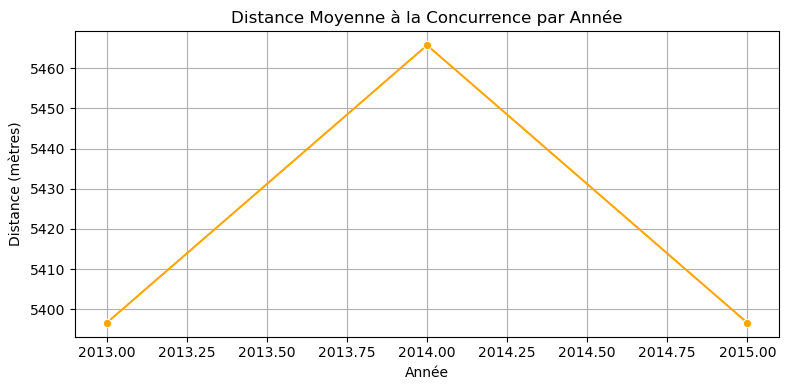

In [147]:
#Analyse de la concurrence (CompetitionDistance) par année:
# Distance moyenne à la concurrence par année
distance_concurrence = df_merge.groupby('Year')['CompetitionDistance'].mean().reset_index()

plt.figure(figsize=(8, 4))
sns.lineplot(data=distance_concurrence, x='Year', y='CompetitionDistance', marker='o', color='orange')
plt.title("Distance Moyenne à la Concurrence par Année")
plt.ylabel("Distance (mètres)")
plt.xlabel("Année")
plt.grid(True)
plt.tight_layout()
plt.show()


**Interprétation**:À partir de 2014, on observe une tendance à la diminution de la distance moyenne avec les concurrents (en mètres). Cela suggère une proximité croissante de la concurrence, susceptible d’avoir un impact direct sur les performances commerciales.

Cette évolution pourrait être corrélée à la baisse des ventes constatée sur la même période, mais également à la réduction du nombre moyen de clients, observée précédemment. L’installation de concurrents plus proches pourrait ainsi avoir contribué à détourner une partie de la clientèle.


Magasin 6 :
Moyenne des ventes mensuelles avant la concurrence : 5189.21 €
Moyenne des ventes mensuelles après la concurrence : 4216.40 €
Variation des ventes : -18.75%


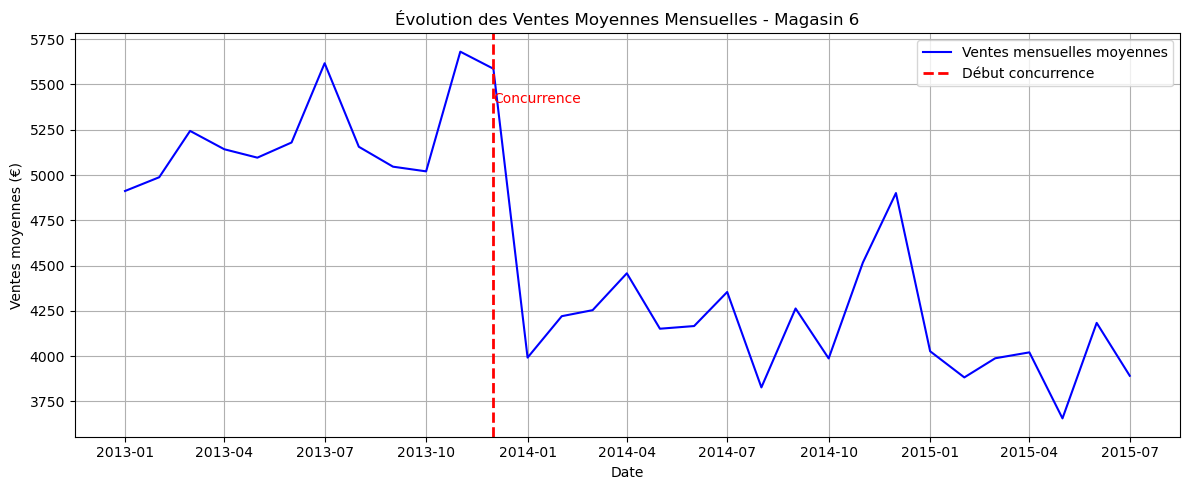

In [149]:
#Analyse de l'impact des concurrents sur les ventes:
def comparaison_ventes_mensuelles_avant_apres_concurrence(store_id):
    # Filtrer les données pour le magasin sélectionné
    store_data = df_merge[df_merge["Store"] == store_id].copy()

    # Conversion de la date
    store_data["Date"] = pd.to_datetime(store_data["Date"])

    # Extraire les périodes mensuelles
    store_data["Mois"] = store_data["Date"].dt.to_period("M").dt.to_timestamp()

    # Calcul de la moyenne mensuelle des ventes
    ventes_moyennes = store_data.groupby("Mois")["Sales"].mean()

    # Récupération de la date d’ouverture de la concurrence
    y = store_data["CompetitionOpenSinceYear"].iloc[0]
    m = store_data["CompetitionOpenSinceMonth"].iloc[0]

    if pd.notnull(y) and pd.notnull(m) and y >= 2013:
        date_concurrence = pd.to_datetime(f"{int(y)}-{int(m):02d}-01")

        # Séparation des ventes avant et après la concurrence
        avant_concurrence = ventes_moyennes[ventes_moyennes.index < date_concurrence]
        apres_concurrence = ventes_moyennes[ventes_moyennes.index >= date_concurrence]

        # Calcul des moyennes
        moyenne_avant = avant_concurrence.mean()
        moyenne_apres = apres_concurrence.mean()

        # Variation en pourcentage
        variation_pct = ((moyenne_apres - moyenne_avant) / moyenne_avant) * 100

        # Affichage des résultats
        print(f"Magasin {store_id} :")
        print(f"Moyenne des ventes mensuelles avant la concurrence : {moyenne_avant:.2f} €")
        print(f"Moyenne des ventes mensuelles après la concurrence : {moyenne_apres:.2f} €")
        print(f"Variation des ventes : {variation_pct:.2f}%")

        # Graphique
        plt.figure(figsize=(12, 5))
        plt.plot(ventes_moyennes.index, ventes_moyennes.values, color='blue', label='Ventes mensuelles moyennes')

        # Marqueur de concurrence
        plt.axvline(x=date_concurrence, color='red', linestyle='--', linewidth=2, label='Début concurrence')
        plt.text(date_concurrence, ventes_moyennes.max()*0.95, 'Concurrence', color='red', ha='left')

        plt.title(f"Évolution des Ventes Moyennes Mensuelles - Magasin {store_id}")
        plt.xlabel("Date")
        plt.ylabel("Ventes moyennes (€)")
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()
    else:
        print(f"Aucune date de concurrence valide pour le magasin {store_id}.")

#Selection d'un magasin
comparaison_ventes_mensuelles_avant_apres_concurrence(6)


<div style="border: 1px solid #006400; padding: 10px; border-radius: 5px; margin-left: 40px;">
  <h4 style="color: #006400; margin: 0;">2.1.4 Dispersion des Ventes pour Chaque Magasin</h4>
</div>

Afin de visualiser la dispersion des ventes par magasin, un boxplot combiné permet de représenter graphiquement la distribution des ventes pour chaque point de vente de manière comparative.

Chaque boîte à moustaches met en évidence :
- la médiane des ventes,
- l’étendue interquartile (Q1 à Q3),
- ainsi que les valeurs aberrantes (outliers), propres à chaque magasin.

Ce type de visualisation est particulièrement utile pour détecter les écarts de performance entre magasins, identifier ceux présentant une forte variabilité ou des ventes anormalement faibles/élevées.

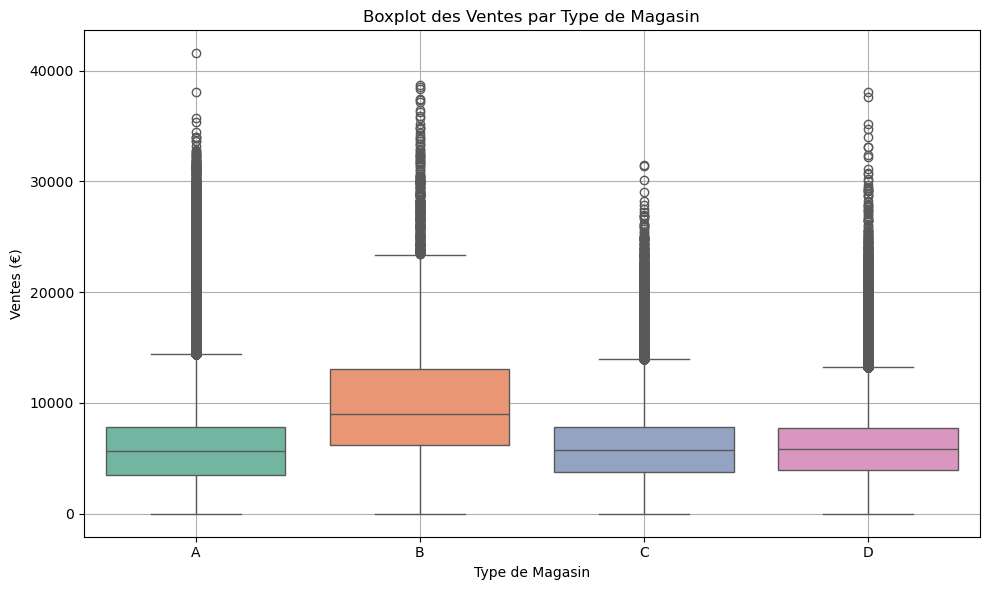

In [152]:
import seaborn as sns
import matplotlib.pyplot as plt

# Créer une copie explicite des DataFrames
df_magasin_a = df_magasin_a.copy()
df_magasin_b = df_magasin_b.copy()
df_magasin_c = df_magasin_c.copy()
df_magasin_d = df_magasin_d.copy()

# Ajouter une colonne 'Magasin' pour identifier les magasins
df_magasin_a['Magasin'] = 'A'
df_magasin_b['Magasin'] = 'B'
df_magasin_c['Magasin'] = 'C'
df_magasin_d['Magasin'] = 'D'


# Combiner les DataFrames des 4 magasins
df_combined = pd.concat([df_magasin_a[['Sales', 'Magasin']], 
                         df_magasin_b[['Sales', 'Magasin']], 
                         df_magasin_c[['Sales', 'Magasin']], 
                         df_magasin_d[['Sales', 'Magasin']]])

# Créer le boxplot 
plt.figure(figsize=(10,6))
sns.boxplot(data=df_combined, x='Magasin', y='Sales', hue='Magasin', palette="Set2")

# Ajouter le titre et les labels
plt.title("Boxplot des Ventes par Type de Magasin")
plt.xlabel("Type de Magasin")
plt.ylabel("Ventes (€)")
plt.grid(True)

# Afficher le graphique
plt.tight_layout()
plt.show()

**Interprétation:**
- Variabilité : Les magasins de types A, C et D présentent une variabilité des ventes relativement similaire. En revanche, le magasin B se distingue par une variabilité plus élevée, suggérant une fluctuation plus marquée de ses performances.
- Valeurs aberrantes : Tous les types de magasins affichent la présence de valeurs aberrantes, correspondant à des ventes exceptionnellement élevées par rapport à la tendance générale.
- Médiane : Les médianes des ventes sont proches pour les magasins A, C et D, tandis que le magasin B affiche une médiane nettement supérieure, indiquant des performances globalement plus fortes.

<div style="border: 1px solid #006400; padding: 10px; border-radius: 5px;">
  <h3 style="color: #006400; margin: 0;">2.2 Déterminer les Paramètres Influants sur le Volume de Vente (Régression Linéaire)</h3>
</div>

<div style="border: 1px solid #006400; padding: 10px; border-radius: 5px; margin-left: 40px;">
  <h4 style="color: #006400; margin: 0;">2.2.1 Relation Linénaire entre le Chiffre d'Affaires Moyen et le Nombre Moyen de Clients</h4>
</div>

L'objectif est d'évaluer s'il existe une corrélation (et une relation linéaire) entre :
- Le chiffre d'affaires moyen par jour par magasin
- Le nombre moyen de clients par jour par magasin

In [157]:
# Calcul du CA quotidien moyen et du nombre moyen de clients par magasin
df_moyennes = df_merge.groupby('Store')[['Sales', 'Customers']].mean().reset_index()

# Renommer les colonnes pour plus de clarté
df_moyennes.columns = ['Store', 'CA_moyen_jour', 'Clients_moyen_jour']

# Vérification
print(df_moyennes.head())

   Store  CA_moyen_jour  Clients_moyen_jour
0      1    3945.704883          467.646497
1      2    4122.991507          486.045648
2      3    5741.253715          620.286624
3      4    8021.769639         1100.057325
4      5    3867.110403          444.360934


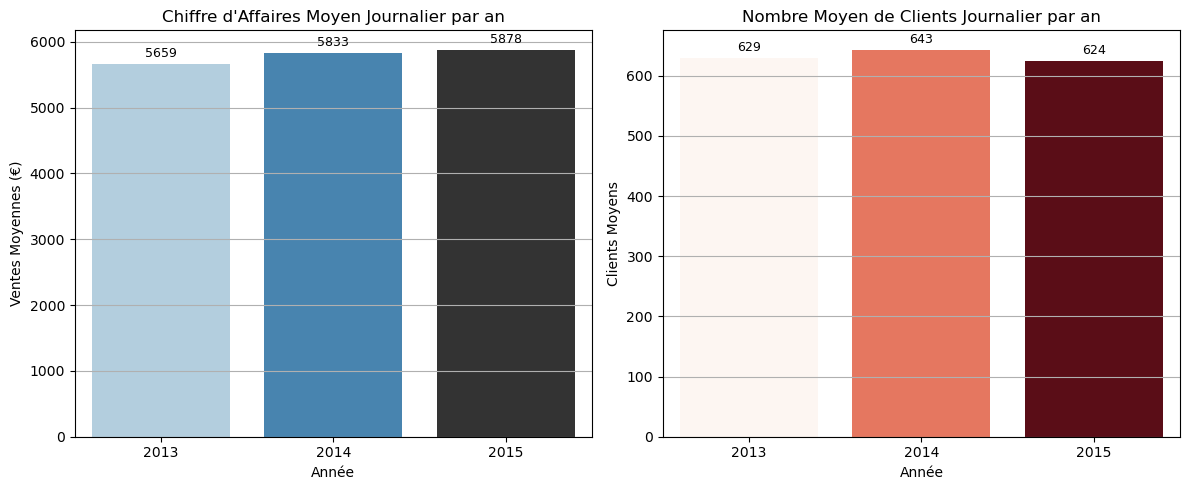

In [158]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Calcul de la moyenne annuelle
df_annuel = df_merge.groupby('Year')[['Sales', 'Customers']].mean().reset_index()
df_annuel.columns = ['Year', 'CA_moyen', 'Clients_moyen']

# Tracé des barplots
plt.figure(figsize=(12, 5))

# Barplot du CA moyen par an
plt.subplot(1, 2, 1)
ax1 = sns.barplot(x='Year', y='CA_moyen', hue='Year', data=df_annuel, palette='Blues_d', legend=False)
plt.title("Chiffre d'Affaires Moyen Journalier par an")
plt.ylabel("Ventes Moyennes (€)")
plt.xlabel("Année")
plt.grid(True, axis='y')

# Ajouter les valeurs
for index, row in df_annuel.iterrows():
    plt.text(x=index, 
             y=row['CA_moyen'] + (row['CA_moyen'] * 0.01), 
             s=f"{row['CA_moyen']:.0f}", 
             ha='center', va='bottom', fontsize=9)

# Barplot du nombre moyen de clients par an
plt.subplot(1, 2, 2)
ax2 = sns.barplot(x='Year', y='Clients_moyen', hue='Year', data=df_annuel, palette='Reds', legend=False)
plt.title("Nombre Moyen de Clients Journalier par an")
plt.ylabel("Clients Moyens")
plt.xlabel("Année")
plt.grid(True, axis='y')

# Ajouter les valeurs
for index, row in df_annuel.iterrows():
    plt.text(x=index, 
             y=row['Clients_moyen'] + (row['Clients_moyen'] * 0.01), 
             s=f"{row['Clients_moyen']:.0f}", 
             ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()


In [159]:
# Calcul du CA moyen global et du nombre moyen de clients sur la période
ca_global_moyen = df_annuel['CA_moyen'].mean()
clients_global_moyen = df_annuel['Clients_moyen'].mean()

# Affichage
print(f"Chiffre d'affaires moyen sur la période : {ca_global_moyen:.0f} €")
print(f"Nombre moyen de clients sur la période : {clients_global_moyen:.0f}")


Chiffre d'affaires moyen sur la période : 5790 €
Nombre moyen de clients sur la période : 632


**Régression Linéaire**

La régression linéaire est une méthode statistique qui permet de modéliser la relation entre une variable dépendante (à prédire) et une ou plusieurs variables indépendantes (explicatives). Elle sert principalement à :

- Prédire une valeur (par exemple, les ventes) en fonction d’autres variables (comme les promotions, le nombre de clients, etc.)
- Mesurer l’impact de chaque variable explicative sur la variable cible
- Détecter des tendances ou des corrélations linéaires entre les variables

En résumé, elle permet de comprendre comment une variable évolue en fonction d’une autre, de manière linéaire.

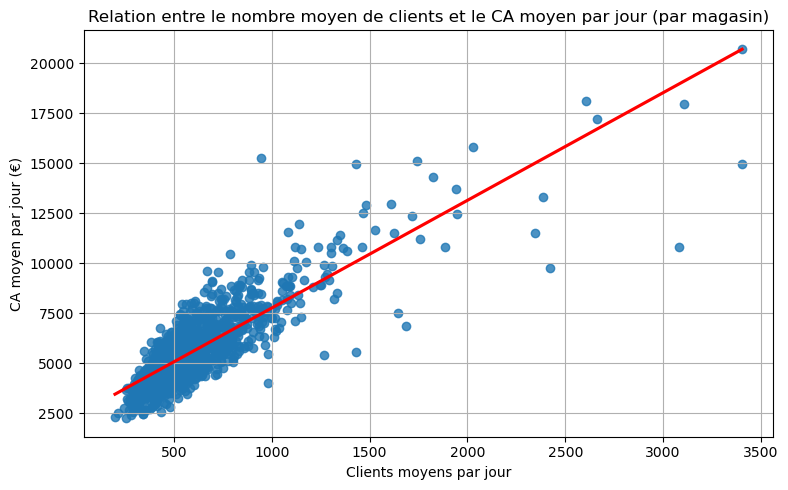

In [162]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.regplot(data=df_moyennes, x='Clients_moyen_jour', y='CA_moyen_jour', ci=None, line_kws={'color': 'red'})
plt.title("Relation entre le nombre moyen de clients et le CA moyen par jour (par magasin)")
plt.xlabel("Clients moyens par jour")
plt.ylabel("CA moyen par jour (€)")
plt.grid(True)
plt.tight_layout()
plt.show()


In [163]:
from sklearn.linear_model import LinearRegression
import numpy as np

X = df_moyennes[['Clients_moyen_jour']]
y = df_moyennes['CA_moyen_jour']

# Création et entraînement du modèle
model = LinearRegression()
model.fit(X, y)

# Affichage des résultats
print("Coefficient (effet d'un client en plus) :", model.coef_[0])
print("Ordonnée à l'origine :", model.intercept_)
print("Score R² (qualité de l'ajustement) :", model.score(X, y))

Coefficient (effet d'un client en plus) : 5.383170863400301
Ordonnée à l'origine : 2374.621913574099
Score R² (qualité de l'ajustement) : 0.7023112769496345


**Interprétation**:

- Coefficient (effet d'un client en plus):5.38
Cela signifie que, pour chaque client supplémentaire, le chiffre d'affaires moyen quotidien augmente d'environ 5,38 €. En d'autres termes, chaque client génère en moyenne 5,38 € de ventes supplémentaires par jour pour chaque magasin.

- Ordonnée à l'origine : 2374.62
Cela correspond au chiffre d'affaires moyen quotidien (en €) lorsque le nombre de clients est égal à zéro. Bien que cela ne soit pas réaliste dans un contexte réel (puisque les magasins ne peuvent pas avoir zéro client), cette valeur peut donner une idée de la base des ventes. Même sans clients actifs, il peut y avoir des ventes via des commandes en ligne ou d'autres facteurs.

- Score R² (qualité de l'ajustement) : 0.70
Le R² de 0.70 indique que la régression linéaire explique environ 70% de la variabilité du chiffre d'affaires moyen quotidien en fonction du nombre moyen de clients par jour. Cela montre une relation assez forte entre les deux variables, mais il existe encore des facteurs non pris en compte dans ce modèle qui influencent le chiffre d'affaires. Ce score suggère également qu'il reste une marge pour améliorer le modèle en ajoutant d'autres variables explicatives (par exemple, type de magasin, promotions, etc.). Cela peut aussi refléter des revenus provenant d'autres sources, telles que des promotions en ligne ou des ventes de produits non liés à la fréquentation physique.

Un coefficient positif indique que plus de clients génèrent un chiffre d'affaires plus élevé. Le R² de 70,2% montre que le nombre moyen de clients par jour explique une grande partie de la variabilité du chiffre d'affaires quotidien moyen. Toutefois, environ 30% de cette variabilité reste inexpliquée, ce qui suggère l'impact d'autres facteurs non modélisés.


<div style="border: 1px solid #006400; padding: 10px; border-radius: 5px; margin-left: 40px;">
  <h4 style="color: #006400; margin: 0;">2.2.2 Déterminer les Paramètres Influants sur le Volume de Vente</h4>
</div>

Identification d'autres paramètres influents:

Outre le nombre de clients, plusieurs variables peuvent avoir un impact significatif sur les ventes des magasins :

- StoreType : Le type de magasin (par exemple, grande surface, magasin spécialisé) peut influencer les ventes en fonction de la taille et de l'assortiment proposé.
- Assortment : Un assortiment plus large peut conduire à des ventes plus élevées, car il attire une clientèle plus diverse.
- CompetitionDistance : La proximité des concurrents peut limiter les ventes. Moins la distance est grande, plus la concurrence est forte.
- Promo2 : Les promotions directes augmentent généralement les ventes, indépendamment de la fréquentation.
- StateHoliday : Les jours fériés influencent les ventes, certains magasins en enregistrent plus, d'autres moins.
- Promo2SinceWeek et Promo2SinceYear : La durée d'une promotion et son démarrage peuvent impacter les ventes selon l'intensité et la fréquence.
- SchoolHoliday : Les vacances scolaires peuvent augmenter la fréquentation des magasins, notamment près des écoles.
- Open : Les jours où le magasin est fermé, en raison de jours fériés ou de maintenance, affectent directement les ventes.

Une heatmap de corrélation va nous permettre d'analyser les relations entre les variables numériques du dataset. Elle permet de visualiser facilement les corrélations (positives ou négatives) et d'identifier rapidement celles qui sont fortement corrélées. Cela est particulièrement utile avant d'ajouter plusieurs variables dans un modèle de régression linéaire, car cela vous aide à repérer les éventuels problèmes de multicolinéarité, où plusieurs variables sont fortement corrélées entre elles.

In [168]:
# Sélectionner uniquement les colonnes numériques
df_numeric = df_merge.select_dtypes(include=['float64', 'int64'])

# Calcul de la matrice de corrélation
correlation_matrix = df_numeric.corr()

# Afficher les corrélations avec la variable 'Sales' triées par ordre décroissant
print(correlation_matrix['Sales'].sort_values(ascending=False))


Sales                        1.000000
Customers                    0.894711
Open                         0.678472
Promo                        0.452345
SchoolHoliday                0.085124
CompetitionOpenSinceYear     0.010115
Store                        0.005126
CompetitionDistance         -0.018869
CompetitionOpenSinceMonth   -0.023638
Promo2SinceWeek             -0.044143
Promo2                      -0.091040
Promo2SinceYear             -0.091056
DayOfWeek                   -0.462125
Name: Sales, dtype: float64


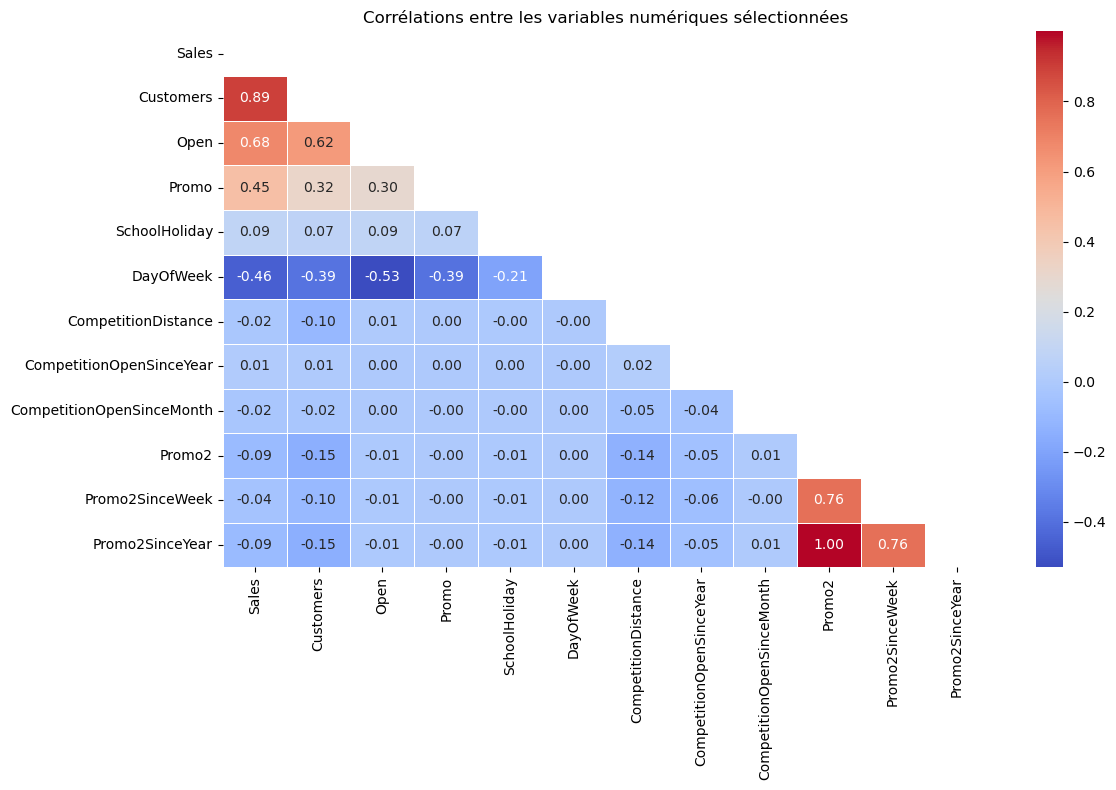

In [169]:
import seaborn as sns
import matplotlib.pyplot as plt

# Liste des colonnes
cols_to_plot = ['Sales', 'Customers', 'Open', 'Promo', 'SchoolHoliday', 'DayOfWeek', 
                'CompetitionDistance', 'CompetitionOpenSinceYear', 
                'CompetitionOpenSinceMonth', 'Promo2', 'Promo2SinceWeek', 'Promo2SinceYear']

# Filtrer la matrice de corrélation sur ces colonnes
corr_filtered = df_numeric[cols_to_plot].corr()

# Masquer la partie inférieure
mask = np.triu(np.ones_like(corr_filtered, dtype=bool))

# Création de la heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_filtered, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5, mask=mask)
plt.title("Corrélations entre les variables numériques sélectionnées")
plt.tight_layout()
plt.show()


L’étude de la matrice de corrélation met en évidence plusieurs relations intéressantes entre les variables :

**Corrélations fortes:**

- Promo2SinceYear et Promo2SinceWeek : Corrélation parfaite (1.00), attendue car ces variables sont liées.
- Customers et Sales : Corrélation élevée (0.89), ce qui confirme que plus un magasin reçoit de clients, plus ses ventes augmentent.
- Open et Customers (0.68), ainsi que Open et Sales (0.53) : Les jours d'ouverture sont logiquement associés à une fréquentation et des ventes plus élevées.

**Corrélations modérées:**

- Promo et Sales : Corrélation de 0.45, indiquant que les promotions boostent les ventes, mais de manière moins marquée que l'affluence.
- Promo et Customers : Corrélation de 0.39, montrant que les promotions attirent davantage de clients.
- SchoolHoliday et Sales : Corrélation de 0.21, suggérant un effet modéré des vacances scolaires sur les ventes.

**Corrélations faibles ou nulles:**

- CompetitionDistance et Sales : Corrélation très faible (-0.03), indiquant que la distance à la concurrence n’influence que peu les ventes.
- DayOfWeek et Sales : Corrélation nulle (0.00), ce qui signifie que le jour de la semaine n’a pas d’impact significatif sur le chiffre d’affaires.

Les variables les plus influentes sur les ventes sont Customers, Open, Promo et dans une moindre mesure SchoolHoliday. 

In [171]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Sélection des variables indépendantes et de la variable cible
X = df_merge[['Customers', 'Open', 'Promo', 'SchoolHoliday']]
y = df_merge['Sales']

# Séparation des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Création et entraînement du modèle de régression linéaire
model = LinearRegression()
model.fit(X_train, y_train)

# Prédictions sur l'ensemble de test
y_pred = model.predict(X_test)

# Évaluation du modèle
print("R² : ", r2_score(y_test, y_pred))

R² :  0.8524656475981814


Le coefficient de détermination R² est de 0.85, ce qui signifie que 85,2 % de la variance des ventes (Sales) est expliquée par le modèle de régression linéaire basé sur les variables suivantes :

- Customers
- Open
- Promo
- SchoolHoliday

Ce résultat est bon dans un contexte opérationnel, en particulier pour un modèle simple. Il montre que ces variables sont pertinentes et bien choisies pour expliquer les variations des ventes..

<div style="border: 1px solid #006400; padding: 10px; border-radius: 5px;">
  <h3 style="color: #006400; margin: 0;">2.3 Catégoriser les Magasins Grâce à K-means selon Différents Critères</h3>
</div>

<div style="border: 1px solid #006400; padding: 10px; border-radius: 5px; margin-left: 40px;">
  <h4 style="color: #006400; margin: 0;">2.3.1 Choix des Variables pour le Clustering </h4>
</div>

Dans le cadre du choix des variables pour le clustering, il est essentiel d'éviter la redondance. Il convient donc de privilégier des variables présentant une faible corrélation entre elles ainsi qu'avec la variable cible (Sales). Cette approche permet de :

- Réduire la multicolinéarité, ce qui améliore la stabilité et la fiabilité des modèles d'analyse.
- Garantir une meilleure interprétabilité des clusters, en évitant que ceux-ci ne soient simplement influencés par une information redondante.

Dans ce contexte, deux variables ont été retenues pour effectuer le clustering :

- Customers :
Cette variable reflète l’affluence dans chaque magasin. Elle présente une forte corrélation avec les ventes (≈ 0.89), ce qui est cohérent : un plus grand nombre de clients tend à entraîner des ventes plus élevées. Toutefois, elle reste pertinente pour le clustering, car elle fournit une information directe sur le comportement des clients, indépendante des politiques commerciales ou des événements ponctuels (promotions, vacances, etc.).

- CompetitionDistance :
Cette variable mesure la distance entre chaque magasin et son concurrent le plus proche. Elle représente une dimension externe liée à l’environnement concurrentiel du point de vente. Sa corrélation avec les ventes est très faible (≈ -0.03), ce qui en fait un complément idéal à la variable Customers. Elle permet d’introduire une perspective géographique et stratégique dans la segmentation, sans créer de redondance avec les comportements d’achat.

En combinant ces deux variables (Customers et CompetitionDistance), il est possible de segmenter les magasins en fonction de leur attractivité vis-à-vis des clients et de leur exposition concurrentielle, offrant ainsi une segmentation plus précise et pertinente.

<div style="border: 1px solid #006400; padding: 10px; border-radius: 5px; margin-left: 40px;">
  <h4 style="color: #006400; margin: 0;">2.3. Le Clustering </h4>
</div>

In [177]:
# Création d'une copie du DataFrame d'origine avec les variables sélectionnées
df_clustering = df_merge[['Store', 'Customers', 'CompetitionDistance']]
# Affichage d'un aperçu du DataFrame
print(df_clustering.head())

   Store  Customers  CompetitionDistance
0      1        555               1270.0
1      1        546               1270.0
2      1        523               1270.0
3      1        560               1270.0
4      1        612               1270.0


In [178]:
# Moyenne par magasin
df_clustering = (
    df_clustering
    .groupby('Store')[['Customers', 'CompetitionDistance']]
    .mean()
    .reset_index()
)
print(df_clustering.head())

   Store    Customers  CompetitionDistance
0      1   467.646497               1270.0
1      2   486.045648                570.0
2      3   620.286624              14130.0
3      4  1100.057325                620.0
4      5   444.360934              29910.0


In [179]:
df_clustering.describe()

,Store,Customers,CompetitionDistance
count,1115.00000,1115.000000,1115.000000
mean,558.00000,629.498620,5396.614350
std,322.01708,318.586404,7654.513635
min,1.00000,199.132696,20.000000
25%,279.50000,449.194268,720.000000
50%,558.00000,562.701699,2325.000000
75%,836.50000,718.176752,6875.000000
max,1115.00000,3403.458599,75860.000000


In [180]:
#Normalisation des données:
from sklearn.preprocessing import StandardScaler

data = df_clustering[['Customers', 'CompetitionDistance']]
std = StandardScaler()
std_data = std.fit_transform(data)
std_data = pd.DataFrame(std_data, columns=['scaled_Customers', 'scaled_CompetitionDistance'])

# Vérification
print(std_data.info())
print(std_data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 2 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   scaled_Customers            1115 non-null   float64
 1   scaled_CompetitionDistance  1115 non-null   float64
dtypes: float64(2)
memory usage: 17.6 KB
None
   scaled_Customers  scaled_CompetitionDistance
0         -0.508260                   -0.539351
1         -0.450482                   -0.630841
2         -0.028928                    1.141458
3          1.477683                   -0.624306
4         -0.581383                    3.203912


**Détermination du nombre optimal de clusters**

La méthode du coude est une technique utilisée pour déterminer le nombre optimal de clusters dans une analyse de type k-means.
Elle consiste à calculer, pour différents nombres de clusters (k), la somme des distances au carré entre chaque point et le centre de son cluster (inertie intra-cluster). Le "coude" du graphique correspond au point où l'ajout d’un cluster supplémentaire n’apporte plus de réduction significative de l’inertie.
C’est à ce niveau que le nombre de clusters est considéré comme optimal, car il équilibre bien précision et simplicité du modèle.

C:\Users\quitt\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
C:\Users\quitt\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
C:\Users\quitt\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
C:\Users\quitt\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

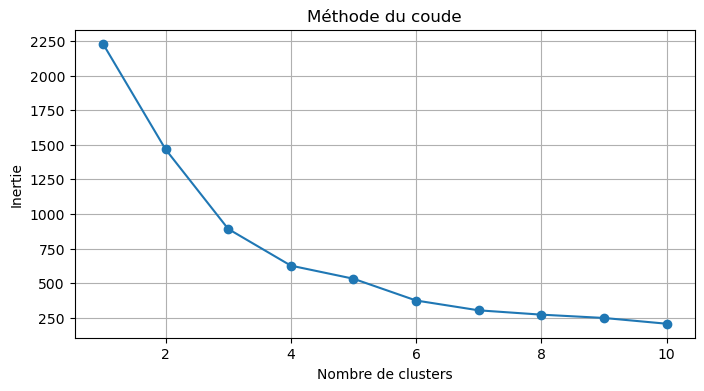

In [183]:
#Déterminer le nombre optimal de clusters (méthode du coude)
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(std_data)  # ici
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Méthode du coude')
plt.xlabel('Nombre de clusters')
plt.ylabel('Inertie')
plt.grid(True)
plt.show()

In [184]:
#Appliquer K-means avec un nombre de clusters choisi: ici 4
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, random_state=42)
# Entraînement du modèle sur les données normalisées
kmeans.fit(std_data)
# Ajouter les labels (résultat du clustering) au DataFrame d'origine
df_clustering['Cluster'] = kmeans.labels_
# Aperçu du résultat
print(df_clustering.head())

   Store    Customers  CompetitionDistance  Cluster
0      1   467.646497               1270.0        0
1      2   486.045648                570.0        0
2      3   620.286624              14130.0        1
3      4  1100.057325                620.0        3
4      5   444.360934              29910.0        1


C:\Users\quitt\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


In [185]:
# Affichage des labels des clusters attribués à chaque point de données
labels = kmeans.labels_
print(labels)

[0 0 1 ... 0 2 0]


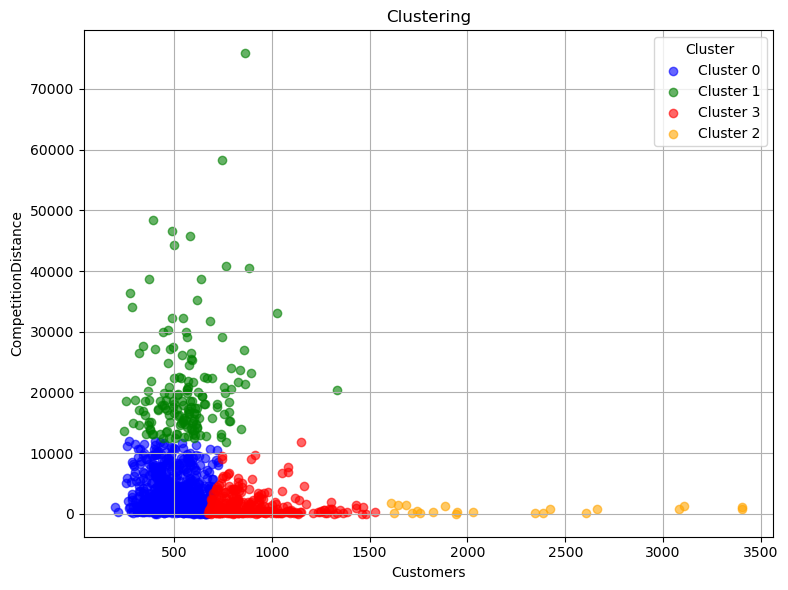

In [186]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))

# Couleurs pour chaque cluster
colors = ['blue', 'green', 'orange', 'red', 'purple']  # à adapter selon le nombre de clusters

# Tracer chaque cluster séparément pour la légende
for cluster_id in df_clustering['Cluster'].unique():
    cluster_data = df_clustering[df_clustering['Cluster'] == cluster_id]
    plt.scatter(
        cluster_data['Customers'], 
        cluster_data['CompetitionDistance'], 
        label=f'Cluster {cluster_id}', 
        color=colors[cluster_id % len(colors)], 
        alpha=0.6
    )

plt.title('Clustering')
plt.xlabel('Customers')
plt.ylabel('CompetitionDistance')
plt.legend(title='Cluster')
plt.grid(True)
plt.tight_layout()
plt.show()


**Analyse des Clusters**

- Cluster 0 (Bleu) :
  - Faible clientèle (moins de 1000 clients)
  - Faible concurrence (moins de 20000)
  - Magasins situés dans des zones moins peuplées avec une  concurrence locale modérée.

--------
- Cluster 1 (Vert) :
  - Clientèle modérée
  - Concurrence modérée
  - Magasins situés dans des zones moyennement peuplées avec une concurrence locale faible.

--------
- Cluster 2 (Orange) :
  - Clientèle élevée (plus de 1500 clients)
  - Concurrence élevéé (proche de 0)
  - Magasins dans des zones très peuplées avec une concurrence élevée.

--------
- Cluster 3 (Rouge) :
  - Clientèle modérée à élevée (plus de 500 clients)
  - Forte Modérée 
  - Magasins situés dans des zones peuplées avec une concurrence élevée.

In [188]:
#Vérifier les colonnes de notre df
print(df_clustering.head())  

   Store    Customers  CompetitionDistance  Cluster
0      1   467.646497               1270.0        0
1      2   486.045648                570.0        0
2      3   620.286624              14130.0        1
3      4  1100.057325                620.0        3
4      5   444.360934              29910.0        1


In [189]:
#Fusionner
df_merge = df_merge.merge(df_clustering[['Store', 'Cluster']], on='Store', how='left')

In [190]:
#Vérification de la fusion
print(df_merge[['Store', 'CompetitionDistance', 'Sales', 'Year', 'Cluster']].head())

   Store  CompetitionDistance  Sales  Year  Cluster
0      1               1270.0   5263  2015        0
1      1               1270.0   5020  2015        0
2      1               1270.0   4782  2015        0
3      1               1270.0   5011  2015        0
4      1               1270.0   6102  2015        0


In [191]:
# Dictionnaire des nouveaux noms de clusters
cluster_names = {
    0: 'Faible Clientèle / Forte Concurrence',
    1: 'Clientèle Modérée / Concurrence Modérée',
    2: 'Clientèle Élevée / Concurrence Modérée',
    3: 'Clientèle Modérée à Élevée / Faible Concurrence'
}

# Ajouter les noms des clusters au DataFrame
df_merge['Cluster_Nom'] = df_merge['Cluster'].map(cluster_names)

# Vérification des résultats
print(df_merge[['Store', 'Cluster', 'Cluster_Nom']].head())


   Store  Cluster                           Cluster_Nom
0      1        0  Faible Clientèle / Forte Concurrence
1      1        0  Faible Clientèle / Forte Concurrence
2      1        0  Faible Clientèle / Forte Concurrence
3      1        0  Faible Clientèle / Forte Concurrence
4      1        0  Faible Clientèle / Forte Concurrence


In [192]:
# Regroupement par cluster pour obtenir les moyennes
cluster_stats = df_merge.groupby('Cluster').agg({
    'CompetitionDistance': 'mean',
    'Customers': 'mean'
}).reset_index()

# Arrondi à 2 décimales
cluster_stats['CompetitionDistance'] = cluster_stats['CompetitionDistance'].round(2)
cluster_stats['Customers'] = cluster_stats['Customers'].round(2)

# Renommage des colonnes
cluster_stats.rename(columns={
    'CompetitionDistance': 'CompetitionDistance_moyenne',
    'Customers': 'Clients_moyens'
}, inplace=True)

# Affichage
print(cluster_stats)

   Cluster  CompetitionDistance_moyenne  Clients_moyens
0        0                      3376.51          493.59
1        1                     20819.02          562.83
2        2                       664.76         2229.82
3        3                      1635.73          890.67


In [193]:
# Enregistrer le DataFrame df_merge dans un fichier CSV
df_merge.to_csv('df_merge_cluster.csv', index=False, sep=';', encoding='utf-8')

<div style="border: 1px solid #006400; background-color: #e6f4ea; padding: 10px; border-radius: 5px;">
  <h2 style="color: #006400; margin: 0;">3. Construire un Modèle de Prévision des Ventes</h2>
</div>

<div style="border: 1px solid #006400; padding: 10px; border-radius: 5px;">
  <h3 style="color: #006400; margin: 0;">3.1  Modelisation par Moyenne Glissante (15 derniers jours)</h3>
</div>

**Objectif**: Prévoir les ventes d’un magasin pour un jour donné en utilisant la moyenne des ventes des 15 jours précédents.

In [197]:
print(df_merge.columns.tolist())

['Store', 'StoreType', 'Assortment', 'CompetitionDistance', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo', 'StateHoliday', 'SchoolHoliday', 'Year', 'Month', 'YearMonth', 'Cluster', 'Cluster_Nom']


In [198]:
import pandas as pd
from dateutil.relativedelta import relativedelta
import matplotlib.pyplot as plt

     Store StoreType       Date  Sales  Sales_MA_15
940      1         c 2013-01-02   5530  5530.000000
939      1         c 2013-01-03   4327  4928.500000
938      1         c 2013-01-04   4486  4781.000000
937      1         c 2013-01-05   4997  4835.000000
935      1         c 2013-01-07   7176  5303.200000
934      1         c 2013-01-08   5580  5349.333333
933      1         c 2013-01-09   5471  5366.714286
932      1         c 2013-01-10   4892  5307.375000
931      1         c 2013-01-11   4881  5260.000000
930      1         c 2013-01-12   4952  5229.200000
MAE (Erreur absolue moyenne) : 950.3041942604857
RMSE (Erreur quadratique moyenne) : 1198.895635226364


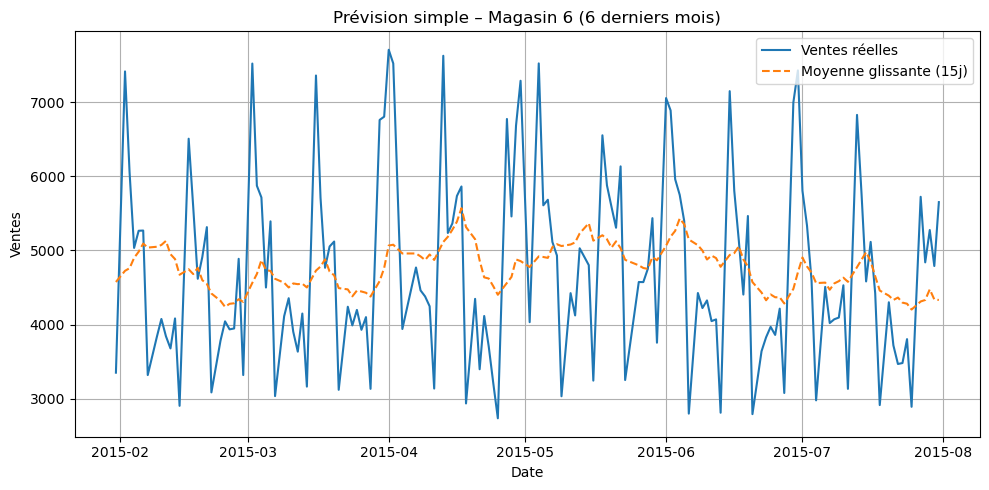

In [199]:
# Importation des fonctions nécessaires
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Créer une copie du DataFrame original
df_moyenne_glissante = df_merge.copy()

# S’assurer que la colonne Date est au bon format
df_moyenne_glissante['Date'] = pd.to_datetime(df_moyenne_glissante['Date'])

# Trier les données pour respecter l’ordre temporel par magasin
df_moyenne_glissante = df_moyenne_glissante.sort_values(by=['Store', 'Date'])

# Filtrer les jours où les ventes sont > à 0
df_moyenne_glissante = df_moyenne_glissante[df_moyenne_glissante['Sales'] > 0]

# Calculer la moyenne glissante des ventes sur 15 jours par magasin
df_moyenne_glissante['Sales_MA_15'] = (
    df_moyenne_glissante
    .groupby('Store')['Sales']
    .transform(lambda x: x.rolling(window=15, min_periods=1).mean())
)

# Afficher les premières lignes pour voir la colonne Sales_MA_15
print(df_moyenne_glissante[['Store', 'StoreType', 'Date', 'Sales', 'Sales_MA_15']].head(10))

# Filtrer sur les 6 derniers mois disponibles dans le DataFrame
date_max = df_moyenne_glissante['Date'].max()
date_seuil = date_max - relativedelta(months=6)

# Appliquer le filtre des 6 derniers mois
df_moyenne_glissante_6mois = df_moyenne_glissante[df_moyenne_glissante['Date'] >= date_seuil]

# Filtrer pour le magasin choisi
store_id = 6
df_plot = df_moyenne_glissante_6mois[df_moyenne_glissante_6mois['Store'] == store_id]

# Calculer les erreurs entre les ventes réelles et la moyenne glissante
# On exclut les NaN possibles
real_sales = df_plot['Sales']
pred_sales = df_plot['Sales_MA_15']

# Filtrer les valeurs où la moyenne glissante est non-nulle
valid_data = ~pred_sales.isna()

real_sales_valid = real_sales[valid_data]
pred_sales_valid = pred_sales[valid_data]

# Calculer le MAE
mae = mean_absolute_error(real_sales_valid, pred_sales_valid)
print(f"MAE (Erreur absolue moyenne) : {mae}")

# Calculer le RMSE
rmse = np.sqrt(mean_squared_error(real_sales_valid, pred_sales_valid))
print(f"RMSE (Erreur quadratique moyenne) : {rmse}")

# Créer le graphique
plt.figure(figsize=(10, 5))
plt.plot(df_plot['Date'], df_plot['Sales'], label='Ventes réelles')
plt.plot(df_plot['Date'], df_plot['Sales_MA_15'], label='Moyenne glissante (15j)', linestyle='--')
plt.title(f"Prévision simple – Magasin {store_id} (6 derniers mois)")
plt.xlabel('Date')
plt.ylabel('Ventes')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


<div style="border: 1px solid #006400; padding: 10px; border-radius: 5px;">
  <h3 style="color: #006400; margin: 0;">3.2 Modelisation par Méthode SARIMA</h3>
</div>

            Store StoreType Assortment  CompetitionDistance  \
Date                                                          
2015-01-31      6         a          a                310.0   
2015-02-01      6         a          a                310.0   
2015-02-02      6         a          a                310.0   
2015-02-03      6         a          a                310.0   
2015-02-04      6         a          a                310.0   

            CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
Date                                                                      
2015-01-31                       12.0                    2013.0       0   
2015-02-01                       12.0                    2013.0       0   
2015-02-02                       12.0                    2013.0       0   
2015-02-03                       12.0                    2013.0       0   
2015-02-04                       12.0                    2013.0       0   

            Promo2SinceWeek  Pro

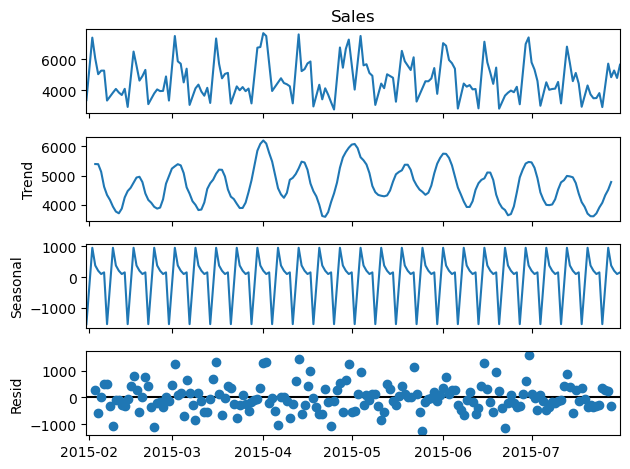

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[7] intercept   : AIC=inf, Time=0.50 sec
 ARIMA(0,0,0)(0,1,0)[7] intercept   : AIC=3111.307, Time=0.01 sec
 ARIMA(1,0,0)(1,1,0)[7] intercept   : AIC=2768.285, Time=0.30 sec
 ARIMA(0,0,1)(0,1,1)[7] intercept   : AIC=inf, Time=0.41 sec
 ARIMA(0,0,0)(0,1,0)[7]             : AIC=3109.343, Time=0.02 sec
 ARIMA(1,0,0)(0,1,0)[7] intercept   : AIC=2945.304, Time=0.07 sec
 ARIMA(1,0,0)(2,1,0)[7] intercept   : AIC=2768.236, Time=0.41 sec
 ARIMA(1,0,0)(2,1,1)[7] intercept   : AIC=inf, Time=0.97 sec
 ARIMA(1,0,0)(1,1,1)[7] intercept   : AIC=2760.711, Time=0.62 sec
 ARIMA(1,0,0)(0,1,1)[7] intercept   : AIC=inf, Time=0.27 sec
 ARIMA(1,0,0)(1,1,2)[7] intercept   : AIC=inf, Time=0.99 sec
 ARIMA(1,0,0)(0,1,2)[7] intercept   : AIC=2780.451, Time=0.84 sec
 ARIMA(1,0,0)(2,1,2)[7] intercept   : AIC=inf, Time=2.00 sec
 ARIMA(0,0,0)(1,1,1)[7] intercept   : AIC=2851.502, Time=0.51 sec
 ARIMA(2,0,0)(1,1,1)[7] intercept   : AIC=2762.700, Time=0.76 s

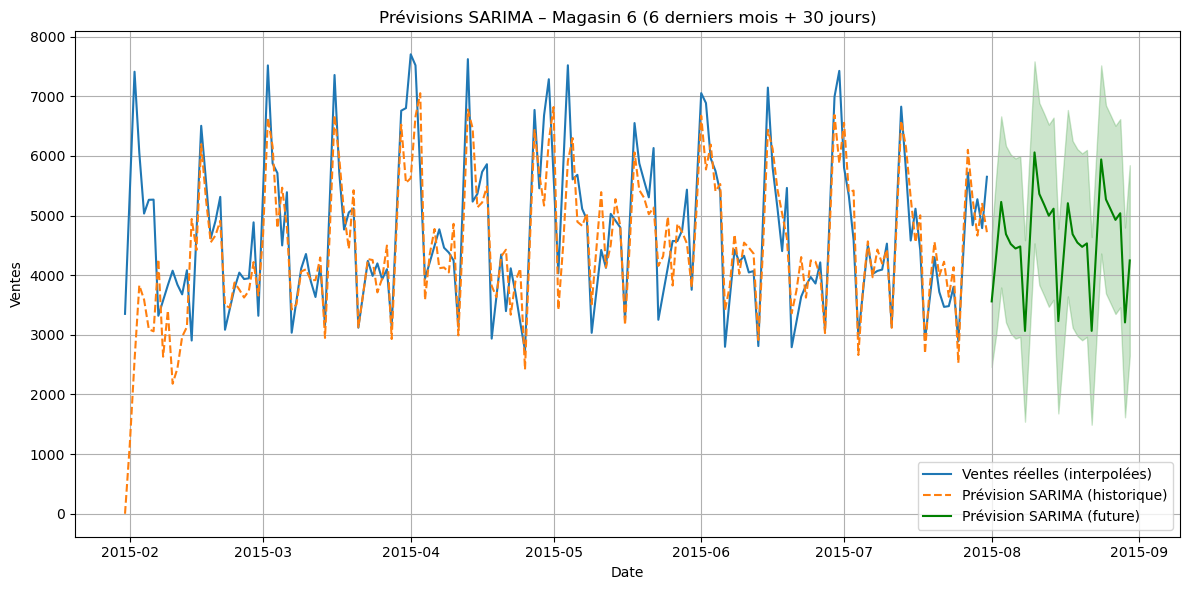

In [201]:
from dateutil.relativedelta import relativedelta
from pmdarima import auto_arima
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# 1. Choix du magasin
store_id = 6

# 2. Filtrer les données du magasin
df_store = df_merge[df_merge['Store'] == store_id].copy()
df_store['Date'] = pd.to_datetime(df_store['Date'])

# 3. Garder uniquement les 6 derniers mois
date_max = df_store['Date'].max()
date_seuil = date_max - relativedelta(months=6)
df_store = df_store[df_store['Date'] >= date_seuil]

# 4. Indexer par la date et agréger les ventes par jour
df_store = df_store.set_index('Date').sort_index()
df_store = df_store.resample('D').sum()

# 5. Remplacer les ventes à zéro par NaN puis interpoler
df_store['Sales'] = df_store['Sales'].replace(0, np.nan)
df_store['Sales'] = df_store['Sales'].interpolate(method='linear')

# 6. Afficher un aperçu après interpolation
print(df_store.head())

# 7. Décomposition saisonnière (hebdomadaire)
decomp = seasonal_decompose(df_store['Sales'], model='additive', period=7)
decomp.plot()
plt.show()

# 8. Auto ARIMA pour déterminer les meilleurs paramètres
stepwise_fit = auto_arima(df_store['Sales'],
                          start_p=1, start_q=1,
                          max_p=3, max_q=3,
                          seasonal=True, m=7,
                          start_P=0, D=1, trace=True,
                          error_action='ignore',
                          suppress_warnings=True,
                          stepwise=True)

# 9. Appliquer les paramètres à SARIMAX
order = stepwise_fit.order
seasonal_order = stepwise_fit.seasonal_order

model = SARIMAX(df_store['Sales'],
                order=order,
                seasonal_order=seasonal_order,
                enforce_stationarity=False,
                enforce_invertibility=False)

results = model.fit()
print(results.summary())

# 10. Prévision sur l’historique
df_store['forecast'] = results.predict(start=0, end=len(df_store)-1, dynamic=False)

# 11. Prévision future sur 30 jours
forecast_steps = 30
future_forecast = results.get_forecast(steps=forecast_steps)
forecast_index = pd.date_range(start=df_store.index[-1] + pd.Timedelta(days=1), periods=forecast_steps)

forecast_mean = future_forecast.predicted_mean.clip(lower=0)  # éviter valeurs négatives
forecast_ci = future_forecast.conf_int().clip(lower=0)

# 12. Affichage
plt.figure(figsize=(12,6))
plt.plot(df_store['Sales'], label='Ventes réelles (interpolées)')
plt.plot(df_store['forecast'], label='Prévision SARIMA (historique)', linestyle='--')
plt.plot(forecast_index, forecast_mean, label='Prévision SARIMA (future)', color='green')
plt.fill_between(forecast_index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1],
                 color='green', alpha=0.2)
plt.title(f'Prévisions SARIMA – Magasin {store_id} (6 derniers mois + 30 jours)')
plt.xlabel('Date')
plt.ylabel('Ventes')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


In [202]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Écarter les éventuelles valeurs manquantes (NaN) dues à l’interpolation ou au démarrage du modèle
mask_valid = df_store['forecast'].notna() & df_store['Sales'].notna()

# Extraire les valeurs réelles et prédites
y_true = df_store.loc[mask_valid, 'Sales']
y_pred = df_store.loc[mask_valid, 'forecast']

# Calculer MAE et RMSE
mae = mean_absolute_error(y_true, y_pred)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))

# Affichage
print(f"MAE (Erreur absolue moyenne) : {mae:.2f}")
print(f"RMSE (Erreur quadratique moyenne) : {rmse:.2f}")


MAE (Erreur absolue moyenne) : 575.96
RMSE (Erreur quadratique moyenne) : 870.66


<div style="border: 1px solid #006400; background-color: #e6f4ea; padding: 10px; border-radius: 5px;">
  <h2 style="color: #006400; margin: 0;">4. Évaluer la Performance du Modèle de Prévision sur les Différents Groupes de Magasin</h2>
</div>

<div style="border: 1px solid #006400; padding: 10px; border-radius: 5px;">
  <h3 style="color: #006400; margin: 0;">4.1 Sélectionner un Magasin par Cluster</h3>
</div>

Pour rappel nous avons identifié 4 clusters qui sont: 

In [206]:
print(cluster_names)

{0: 'Faible Clientèle / Forte Concurrence', 1: 'Clientèle Modérée / Concurrence Modérée', 2: 'Clientèle Élevée / Concurrence Modérée', 3: 'Clientèle Modérée à Élevée / Faible Concurrence'}


In [207]:
# Ajout des colonnes normalisées au DataFrame df_clustering
df_clustering[['scaled_Customers', 'scaled_CompetitionDistance']] = std_data

In [208]:
from scipy.spatial.distance import cdist
import numpy as np

# Récupération des centroïdes
centroids = kmeans.cluster_centers_

# Calcul de la distance entre chaque point et son centroïde
df_clustering['Distance_to_Centroid'] = cdist(
    df_clustering[['scaled_Customers', 'scaled_CompetitionDistance']],
    centroids
)[np.arange(len(df_clustering)), df_clustering['Cluster']]

In [209]:
# Sélection du magasin le plus proche du centroïde pour chaque cluster
closest_stores = df_clustering.loc[
    df_clustering.groupby('Cluster')['Distance_to_Centroid'].idxmin(),
    ['Store', 'Cluster', 'Distance_to_Centroid']
]

print(closest_stores)

     Store  Cluster  Distance_to_Centroid
827    828        0              0.019582
770    771        1              0.017015
258    259        2              0.373097
389    390        3              0.014432


<div style="border: 1px solid #006400; padding: 10px; border-radius: 5px;">
  <h3 style="color: #006400; margin: 0;">4.2 Comparaison des Performances des Modèles pour un Magasin Donné dans Chaque Groupe</h3>
</div>

In [211]:
import pandas as pd
import numpy as np
from dateutil.relativedelta import relativedelta
from sklearn.metrics import mean_absolute_error, mean_squared_error
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Étape 1 – Liste des magasins représentatifs à partir de df_clustering
closest_stores = df_clustering.loc[
    df_clustering.groupby('Cluster')['Distance_to_Centroid'].idxmin(),
    ['Store']
]
representative_stores = closest_stores['Store'].tolist()

# Étape 2 – Analyse par magasin
results = []

for store_id in representative_stores:
    # 1. Filtrer les données du magasin avec ventes > 0
    df_store = df_merge[(df_merge['Store'] == store_id) & (df_merge['Sales'] > 0)].copy()
    df_store['Date'] = pd.to_datetime(df_store['Date'])

    # 2. Restreindre aux 6 derniers mois
    date_max   = df_store['Date'].max()
    date_seuil = date_max - relativedelta(months=6)
    df_store   = df_store[df_store['Date'] >= date_seuil]

    # 3. Indexation et agrégation par jour
    df_store = df_store.set_index('Date').sort_index()
    df_store = df_store.resample('D').sum()

    # 4. Moyenne mobile 15 jours
    df_store['MA_15'] = df_store['Sales'].rolling(window=15, min_periods=1).mean()
    mae_ma  = mean_absolute_error(df_store['Sales'], df_store['MA_15'])
    rmse_ma = np.sqrt(mean_squared_error(df_store['Sales'], df_store['MA_15']))

    # 5. SARIMA (1,1,1)(1,1,1,7)
    model = SARIMAX(df_store['Sales'],
                    order=(1, 1, 1),
                    seasonal_order=(1, 1, 1, 7),
                    enforce_stationarity=False,
                    enforce_invertibility=False)
    res = model.fit(disp=False)
    df_store['SARIMA'] = res.predict(start=0, end=len(df_store)-1, dynamic=False)
    mae_sarima  = mean_absolute_error(df_store['Sales'], df_store['SARIMA'])
    rmse_sarima = np.sqrt(mean_squared_error(df_store['Sales'], df_store['SARIMA']))

    # 6. Récupérer les infos de cluster
    info = df_merge[df_merge['Store'] == store_id][['Store','Cluster','Cluster_Nom']].drop_duplicates().iloc[0]

    # 7. Stockage des résultats
    results.append({
        'Store'      : store_id,
        'Cluster'    : info['Cluster'],
        'Cluster_Nom': info['Cluster_Nom'],
        'MAE_MA15'   : mae_ma,
        'RMSE_MA15'  : rmse_ma,
        'MAE_SARIMA' : mae_sarima,
        'RMSE_SARIMA': rmse_sarima
    })

# 8. Affichage final
df_results = pd.DataFrame(results)
print(df_results.to_string(index=False))


 Store  Cluster                                     Cluster_Nom    MAE_MA15   RMSE_MA15  MAE_SARIMA  RMSE_SARIMA
   828        0            Faible Clientèle / Forte Concurrence 1831.700317 2338.717702 1083.498325  1650.001343
   771        1         Clientèle Modérée / Concurrence Modérée 2018.366310 2726.763177 1314.381802  1998.918705
   259        2          Clientèle Élevée / Concurrence Modérée 1851.697160 2477.140877 1420.716932  2182.275367
   390        3 Clientèle Modérée à Élevée / Faible Concurrence 3599.349196 4883.796596 2411.724267  3680.545518


<Figure size 1000x500 with 0 Axes>

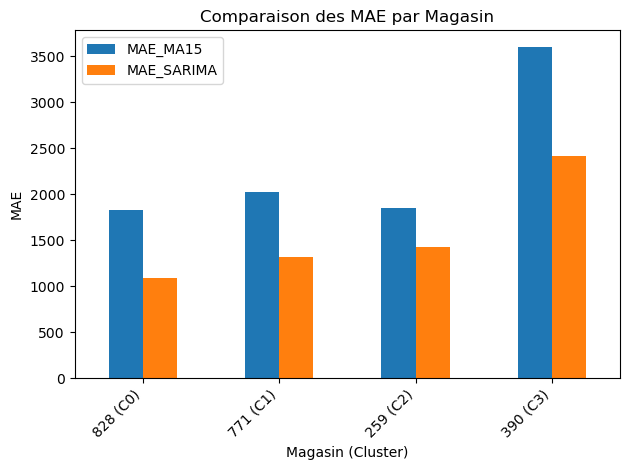

<Figure size 1000x500 with 0 Axes>

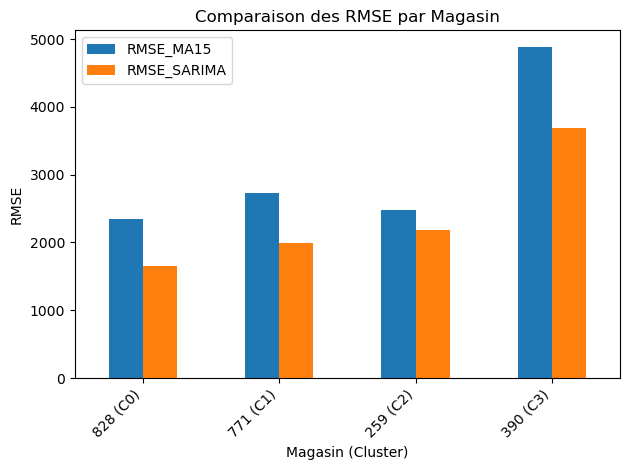

In [212]:
# =====================================
# === Visualisation des résultats ====
# =====================================

# Création d’un index combiné Store + Cluster
df_plot = df_results.copy()
df_plot['Store_Cluster'] = df_plot['Store'].astype(str) + ' (C' + df_plot['Cluster'].astype(str) + ')'
df_plot = df_plot.set_index('Store_Cluster')

# 1) Histogramme comparant les MAE des deux méthodes
plt.figure(figsize=(10, 5))
df_plot[['MAE_MA15', 'MAE_SARIMA']].plot(kind='bar', legend=True)
plt.title('Comparaison des MAE par Magasin')
plt.xlabel('Magasin (Cluster)')
plt.ylabel('MAE')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 2) Histogramme comparant les RMSE des deux méthodes
plt.figure(figsize=(10, 5))
df_plot[['RMSE_MA15', 'RMSE_SARIMA']].plot(kind='bar', legend=True)
plt.title('Comparaison des RMSE par Magasin')
plt.xlabel('Magasin (Cluster)')
plt.ylabel('RMSE')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Suite aux différentes comparaisons de performance des modèles, nous constatons que la méthode SARIMA présente des valeurs de MAE (Mean Absolute Error) et de RMSE (Root Mean Squared Error) plus faibles que celles obtenues avec la moyenne mobile. Cela indique que SARIMA offre une meilleure précision de prédiction sur notre série temporelle.

Contrairement à la moyenne mobile, qui lisse simplement les valeurs passées sans prendre en compte la tendance ou la saisonnalité, le modèle SARIMA intègre ces composantes de manière explicite. Il est donc plus adapté aux séries présentant des comportements saisonniers ou des évolutions structurelles, comme c’est le cas dans notre jeu de données.

En résumé, SARIMA est plus performant car il modélise plus finement la dynamique des ventes, là où la moyenne mobile reste limitée à une approche purement descriptive.

<div style="border: 1px solid #006400; background-color: #e6f4ea; padding: 10px; border-radius: 5px;">
  <h2 style="color: #006400; margin: 0;">5. Recommendations </h2>
</div>

<div style="border: 1px solid #006400; padding: 10px; border-radius: 5px;">
  <h3 style="color: #006400; margin: 0;">5.1 Pistes d’Optimisation Basées sur les Résultats</h3>
</div>

**Analyse des ventes et des clients** :

- Augmenter le nombre de clients: Le nombre moyen de clients explique 70,2% de la variabilité du chiffre d'affaires, il est donc important d'attirer plus de clients. Des campagnes marketing ciblées, des promotions attractives, ou une meilleure expérience client peuvent avoir un impact significatif. Il pourrait également être utile de cibler des segments spécifiques de clients pour augmenter la fréquentation en magasin.

- Optimiser les jours d'ouverture: La corrélation entre les jours d’ouverture (Open) et les ventes (Sales) montre que l'extension des heures d'ouverture pourrait augmenter les ventes, particulièrement lors de pics d'affluence. Analyser les périodes de forte affluence et ajuster les horaires d'ouverture en conséquence, peut attirer plus de clients.

- Promotions: Les promotions (Promo) ont un impact modéré sur les ventes, mais cela peut être amélioré en rendant les promotions plus ciblées. Par exemple, ajustez les offres en fonction de la typologie des clients et de la saisonnalité. Utiliser des promotions croisées (ex. produits complémentaires) pour encourager les achats additionnels.

**Concurrence et localisation:**

- Surveiller la concurrence :Bien que la distance par rapport aux concurrents présente une faible corrélation avec les ventes, il reste essentiel de suivre les évolutions de l’environnement concurrentiel. Une baisse des ventes liée à la concurrence a notamment été observée en 2014. 

- Optimisation géographique : Pour les magasins dans des zones fortement concurrentielles, nous pouvons mettre en place des promos, événeemnts exclusifs. 

**Segmentation et personnalisation:**

- Segmentation des clients : Utiliser les clusters de magasins pour personnaliser les stratégies commerciales. Par exemple, les magasins à forte fréquentation peuvent se concentrer sur l'optimisation de l'expérience client, tandis que ceux avec une faible concurrence peuvent se concentrer sur l'augmentation des marges en introduisant des produits haut de gamme.

<div style="border: 1px solid #006400; padding: 10px; border-radius: 5px;">
  <h3 style="color: #006400; margin: 0;">5.2 Adapter les Stratégies Commerciales selon les Typologies de Magasin</h3>
</div>

**Cluster 0 : Faible Clientèle / Forte Modérée**
- Stratégies : Mettre l’accent sur l’attraction de nouveaux clients. Proposer des promotions plus agressives et renforcer l’expérience client pour fidéliser la clientèle existante.
- Actions :Mettre en place des campagnes de marketing local, proposer des offres attractives pour les nouveaux clients, et améliorer la signalisation ainsi que l’agencement du magasin pour le rendre plus accueillant.

**Cluster 1 : Clientèle Modérée / Concurrence Faible**
- Stratégies : Conserver une bonne visibilité et offrir des promotions régulières pour maintenir la fidélité des clients. Trouver un équilibre entre l’attractivité des prix et la qualité de l’expérience client.
- Actions : Développer des programmes de fidélité, organiser des événements en magasin, et investir dans une publicité ciblée pour attirer davantage de clients.

**Cluster 2 : Clientèle Élevée / Concurrence Elevée**
- Stratégies : Maximiser les ventes en proposant des produits exclusifs et en améliorant le service client. Profiter de l’afflux de clients pour mettre en avant des produits à plus forte marge et renforcer les mécanismes de fidélisation.
- Actions :Former continuellement le personnel, créer des offres personnalisées pour les clients fidèles, et optimiser l’agencement du magasin pour faciliter le parcours d’achat.

**Cluster 3 : Clientèle Modérée à Élevée / Concurrence Elevée**
- Stratégies : Exploiter la faible concurrence pour augmenter les marges et introduire des produits premium, tout en attirant une nouvelle clientèle via des campagnes marketing ciblées.
- Actions :Introduire de nouvelles gammes de produits haut de gamme, améliorer la présentation en magasin pour mieux valoriser ces produits, et utiliser des campagnes de marketing pour renforcer la fidélité des clients.

<div style="border: 1px solid #006400; padding: 10px; border-radius: 5px;">
  <h3 style="color: #006400; margin: 0;">5.3 Améliorations du Modèle selon les Performances Observées</h3>
</div>

Dans l’ensemble des cas analysés, le modèle SARIMA s’est révélé plus performant que la moyenne glissante, avec des valeurs de MAE et de RMSE systématiquement plus faibles.
Cela indique une meilleure précision dans les prévisions.

Cette supériorité s’explique par la capacité de SARIMA à :
- Capturer les tendances de fond,
- Modéliser la saisonnalité (ici hebdomadaire),
- S’adapter à des dynamiques temporelles complexes.

**Pistes d'amélioration**:
- Tester des modèles plus avancés comme Prophet (Facebook), particulièrement adapté à la gestion des jours fériés, des effets saisonniers multiples et des tendances non linéaires.
- Envisager l’intégration de variables externes : météo, événements locaux, indicateurs économiques, etc.
- Optimisation du clustering: Réévaluer les variables de segmentation : StoreType, Promotions, jours d’ouverture, etc.
- Croiser les performances des modèles avec les clusters pour améliorer la pertinence de la segmentation.
- Mise à jour continue et retours terrain: Mettre en place une mise à jour automatique des modèles à partir des nouvelles données.
- Organiser des échanges réguliers avec les responsables de magasins pour recueillir des retours qualitatifs sur les ventes, les promotions et les comportements clients.
